<a href="https://colab.research.google.com/github/morerule/first-repository/blob/master/mental.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# 경고 메시지 무시
warnings.filterwarnings('ignore')

# 그래프 스타일 설정
sns.set_style("whitegrid")
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

In [ ]:
df = pd.read_csv('train.csv')

display(df.head())

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


In [ ]:
# 데이터의 전체적인 정보 확인 (행 개수, 컬럼 이름, 결측치 여부)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 20 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140700 non-null  int64  
 1   Name                                   140700 non-null  object 
 2   Gender                                 140700 non-null  object 
 3   Age                                    140700 non-null  float64
 4   City                                   140700 non-null  object 
 5   Working Professional or Student        140700 non-null  object 
 6   Profession                             104070 non-null  object 
 7   Academic Pressure                      27897 non-null   float64
 8   Work Pressure                          112782 non-null  float64
 9   CGPA                                   27898 non-null   float64
 10  Study Satisfaction                     27897 non-null   

In [ ]:
# 수치형 데이터(나이, 학점 등)의 통계 요약
display(df.describe())

# 범주형 데이터(도시, 직업 등)에 어떤 값들이 들어있는지 확인
print("\n🏙️ [도시 분포 확인]")
print(df['City'].value_counts())

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,140700.000000,140700.000000,27897.000000,112782.000000,27898.000000,27897.000000,112790.000000,140700.000000,140696.000000,140700.000000
mean,70349.500000,40.388621,3.142273,2.998998,7.658636,2.944940,2.974404,6.252679,2.988983,0.181713
std,40616.735775,12.384099,1.380457,1.405771,1.464466,1.360197,1.416078,3.853615,1.413633,0.385609
min,0.000000,18.000000,1.000000,1.000000,5.030000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,35174.750000,29.000000,2.000000,2.000000,6.290000,2.000000,2.000000,3.000000,2.000000,0.000000
50%,70349.500000,42.000000,3.000000,3.000000,7.770000,3.000000,3.000000,6.000000,3.000000,0.000000
75%,105524.250000,51.000000,4.000000,4.000000,8.920000,4.000000,4.000000,10.000000,4.000000,0.000000
max,140699.000000,60.000000,5.000000,5.000000,10.000000,5.000000,5.000000,12.000000,5.000000,1.000000



🏙️ [도시 분포 확인]
City
Kalyan         6591
Patna          5924
Vasai-Virar    5765
Kolkata        5689
Ahmedabad      5613
               ... 
Pooja             1
Khushi            1
Khaziabad         1
Jhanvi            1
Unirar            1
Name: count, Length: 98, dtype: int64


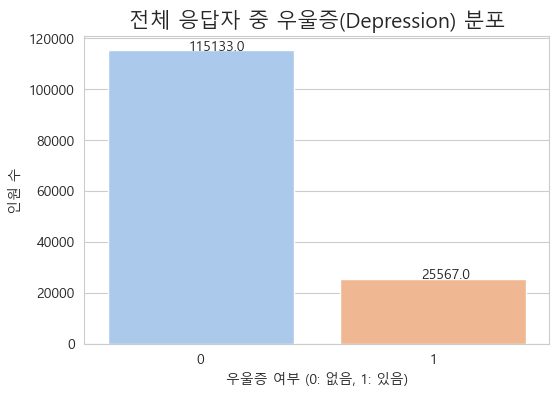

In [ ]:
# 우울증(Depression) 비율 시각화
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='Depression', data=df, palette='pastel')

# 그래프 위에 숫자 표시하기
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + 0.35, p.get_height() + 5))

plt.title('전체 응답자 중 우울증(Depression) 분포', fontsize=15)
plt.xlabel('우울증 여부 (0: 없음, 1: 있음)')
plt.ylabel('인원 수')
plt.show()

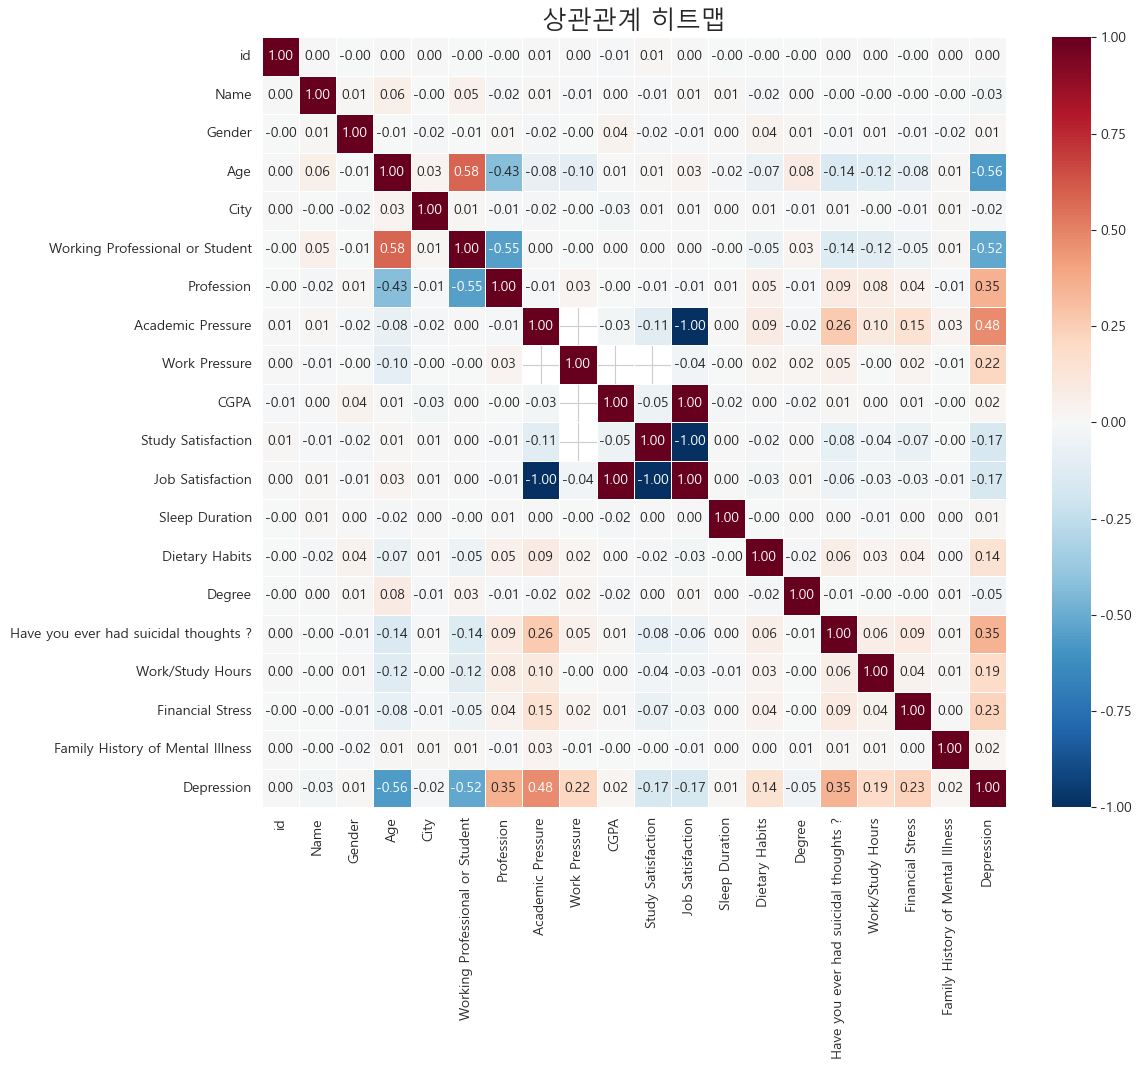

In [ ]:
from sklearn.preprocessing import LabelEncoder


df_corr = df.copy()


le = LabelEncoder()
for col in df_corr.select_dtypes(include='object').columns:
    df_corr[col] = le.fit_transform(df_corr[col])

# 상관관계 계산
corr_matrix = df_corr.corr()

# 히트맵 그리기
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='RdBu_r', linewidths=0.5)
plt.title('상관관계 히트맵', fontsize=18)
plt.show()


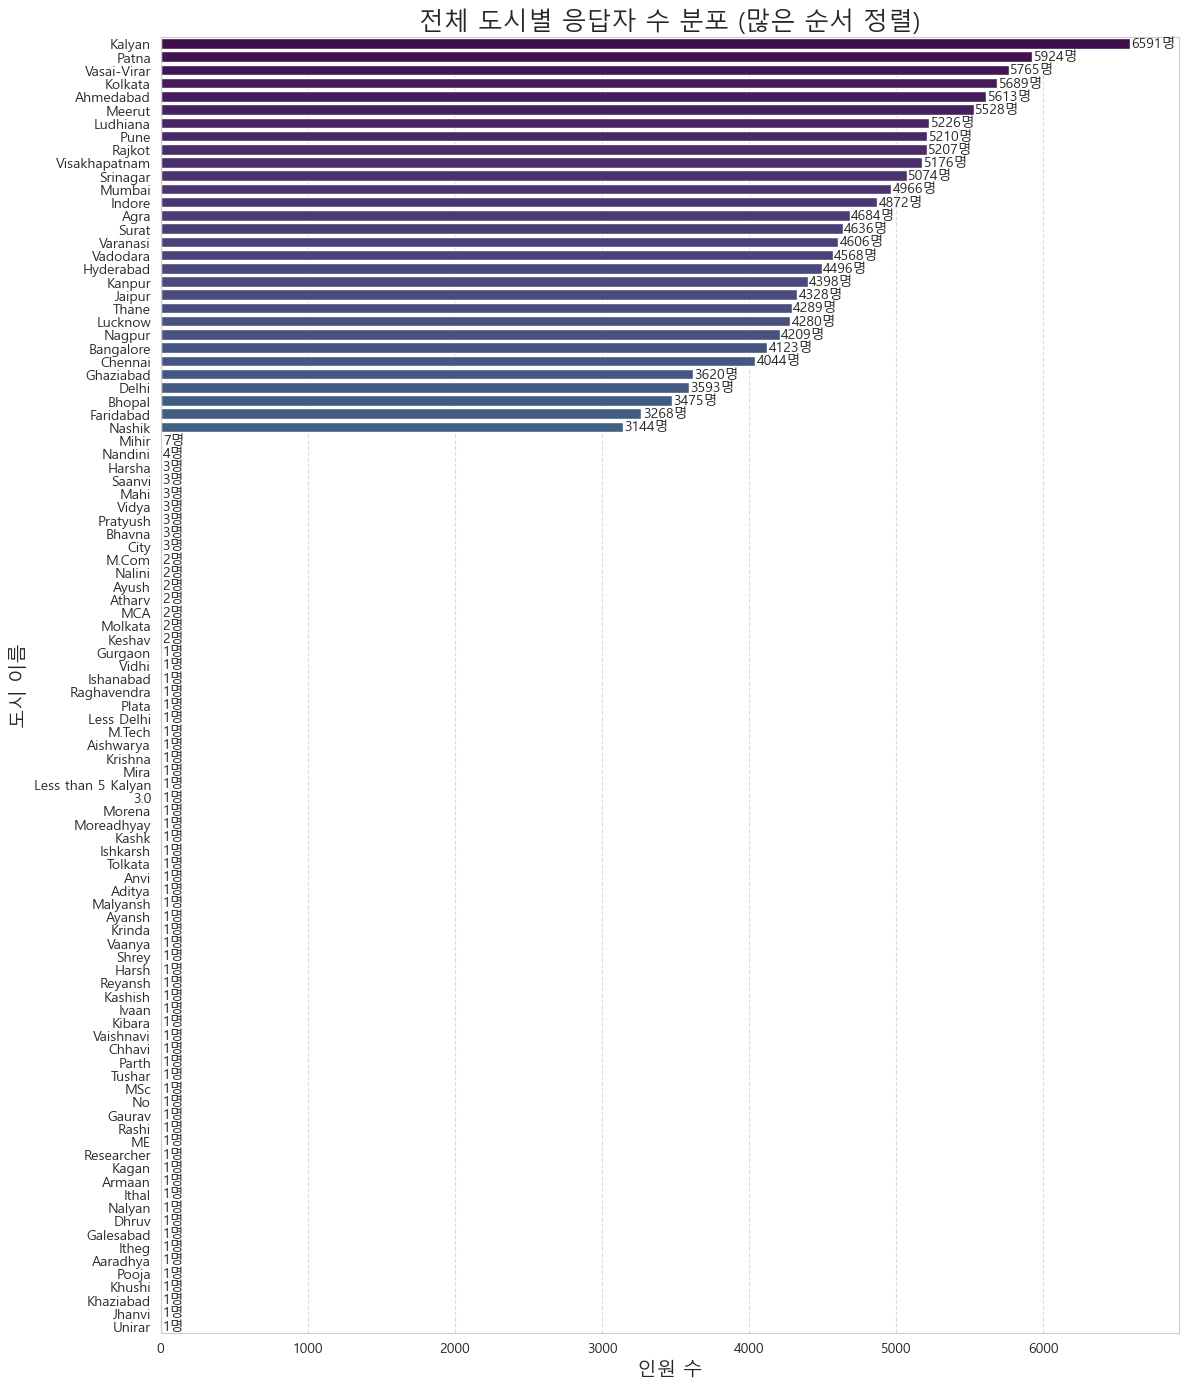

In [ ]:



plt.figure(figsize=(12, 14))


city_order = df['City'].value_counts().index


ax = sns.countplot(y='City', data=df, order=city_order, palette='viridis')


for p in ax.patches:
    width = p.get_width()
    ax.text(width + 10,
            p.get_y() + p.get_height() / 2,
            f'{int(width)}명',
            ha='left', va='center', fontsize=10)


plt.title('전체 도시별 응답자 수 분포 (많은 순서 정렬)', fontsize=18)
plt.xlabel('인원 수', fontsize=14)
plt.ylabel('도시 이름', fontsize=14)


plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.7) # 세로 격자선 추가

plt.show()


In [ ]:
# 도시별 데이터 수 확인
city_counts = df['City'].value_counts()

# 데이터 수가 10개 이하인 도시 리스트 추출
cities_to_group = city_counts[city_counts <= 10].index

# 해당 도시들을 'Other'로 변경
df.loc[df['City'].isin(cities_to_group), 'City'] = 'Other'

# 결과 확인
print(df['City'].value_counts())

City
Kalyan           6591
Patna            5924
Vasai-Virar      5765
Kolkata          5689
Ahmedabad        5613
Meerut           5528
Ludhiana         5226
Pune             5210
Rajkot           5207
Visakhapatnam    5176
Srinagar         5074
Mumbai           4966
Indore           4872
Agra             4684
Surat            4636
Varanasi         4606
Vadodara         4568
Hyderabad        4496
Kanpur           4398
Jaipur           4328
Thane            4289
Lucknow          4280
Nagpur           4209
Bangalore        4123
Chennai          4044
Ghaziabad        3620
Delhi            3593
Bhopal           3475
Faridabad        3268
Nashik           3144
Other              98
Name: count, dtype: int64


In [ ]:
# 도시 그룹 매핑 정의
city_group_map = {
    # Group A: IT & Education Hubs (고압박/경쟁)
    'Bangalore': 'Tier1_Tech', 'Bengaluru': 'Tier1_Tech',
    'Hyderabad': 'Tier1_Tech', 'Pune': 'Tier1_Tech',

    # Group B: Satellite Cities (통근/베드타운)
    'Thane': 'Satellite', 'Kalyan': 'Satellite',
    'Ghaziabad': 'Satellite', 'Faridabad': 'Satellite',
    'Vasai-Virar': 'Satellite',

    # Group C: Established Metros (전통 상업/무역)
    'Kolkata': 'Tier1_Trade', 'Mumbai': 'Tier1_Trade',
    'Ahmedabad': 'Tier1_Trade', 'Chennai': 'Tier1_Trade',
    'Surat': 'Tier1_Trade',

    # Group D: Emerging Tier 2 (지방 거점/성장 도시)
    'Indore': 'Tier2', 'Bhopal': 'Tier2', 'Nagpur': 'Tier2',
    'Nashik': 'Tier2', 'Visakhapatnam': 'Tier2', 'Patna': 'Tier2',
    'Jaipur': 'Tier2', 'Lucknow': 'Tier2', 'Kanpur': 'Tier2',
    'Vadodara': 'Tier2', 'Ludhiana': 'Tier2', 'Agra': 'Tier2',
    'Meerut': 'Tier2', 'Varanasi': 'Tier2',

    # Group E: Special Context
    'Srinagar': 'Special_Zone'
}

# 매핑 적용하여 새로운 컬럼 생성 (매핑에 없는 도시는 'Other'로 처리)
df['City_Group'] = df['City'].map(city_group_map).fillna('Other')

# 결과 확인
print("도시 그룹별 분포:")
print(df['City_Group'].value_counts())

도시 그룹별 분포:
City_Group
Tier2           64418
Tier1_Trade     24948
Satellite       23533
Tier1_Tech      13829
Other            8898
Special_Zone     5074
Name: count, dtype: int64


=== [도시 유형별 우울증 위험 지수 (Top 5)] ===
City_Group
Special_Zone    21.17%
Tier1_Tech      20.25%
Satellite        19.9%
Tier1_Trade     18.38%
Other           18.09%
Tier2           16.79%
Name: Depression, dtype: object


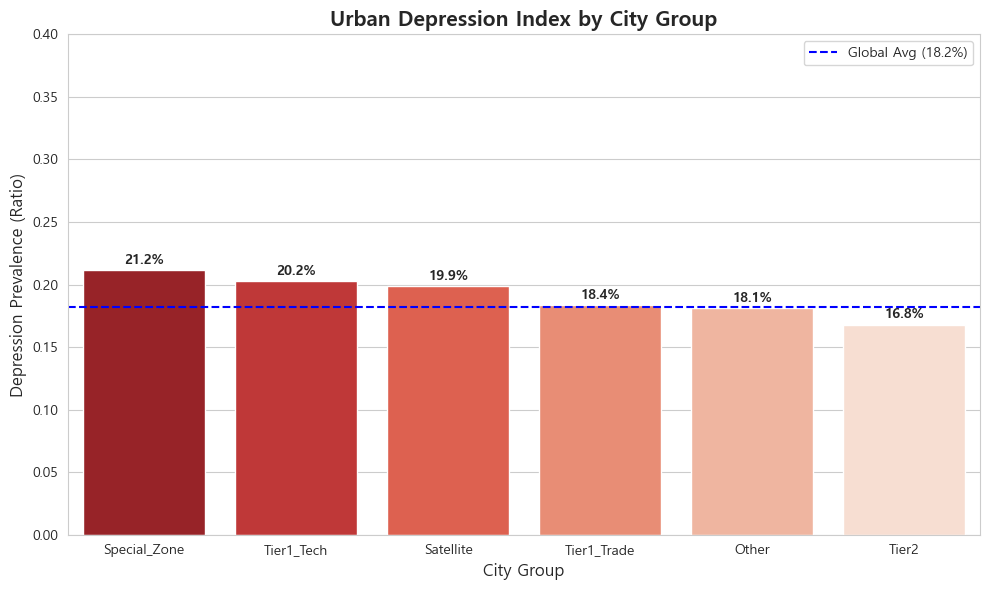

In [ ]:
# 1. 컬럼 이름 맞추기 (City_Category -> City_Group, Depression_Binary -> Depression)

depression_index = df.groupby('City_Group')['Depression'].mean().sort_values(ascending=False)

# 2. 결과 수치 출력
print("=== [도시 유형별 우울증 위험 지수 (Top 5)] ===")
print((depression_index * 100).round(2).astype(str) + '%')

# 3. 시각화
plt.figure(figsize=(10, 6))

# 색상 팔레트 설정
sns.barplot(x=depression_index.index, y=depression_index.values, palette='Reds_r')

# 그래프 꾸미기
plt.title('Urban Depression Index by City Group', fontsize=15, fontweight='bold')
plt.ylabel('Depression Prevalence (Ratio)', fontsize=12)
plt.xlabel('City Group', fontsize=12)
plt.ylim(0, 0.4)

# 막대 위에 수치 표시하기
for i, v in enumerate(depression_index.values):
    plt.text(i, v + 0.005, f"{v*100:.1f}%", ha='center', fontweight='bold')

# 전체 평균선 추가
global_mean = df['Depression'].mean()
plt.axhline(global_mean, color='blue', linestyle='--', label=f'Global Avg ({global_mean*100:.1f}%)')
plt.legend()

plt.tight_layout()
plt.show()


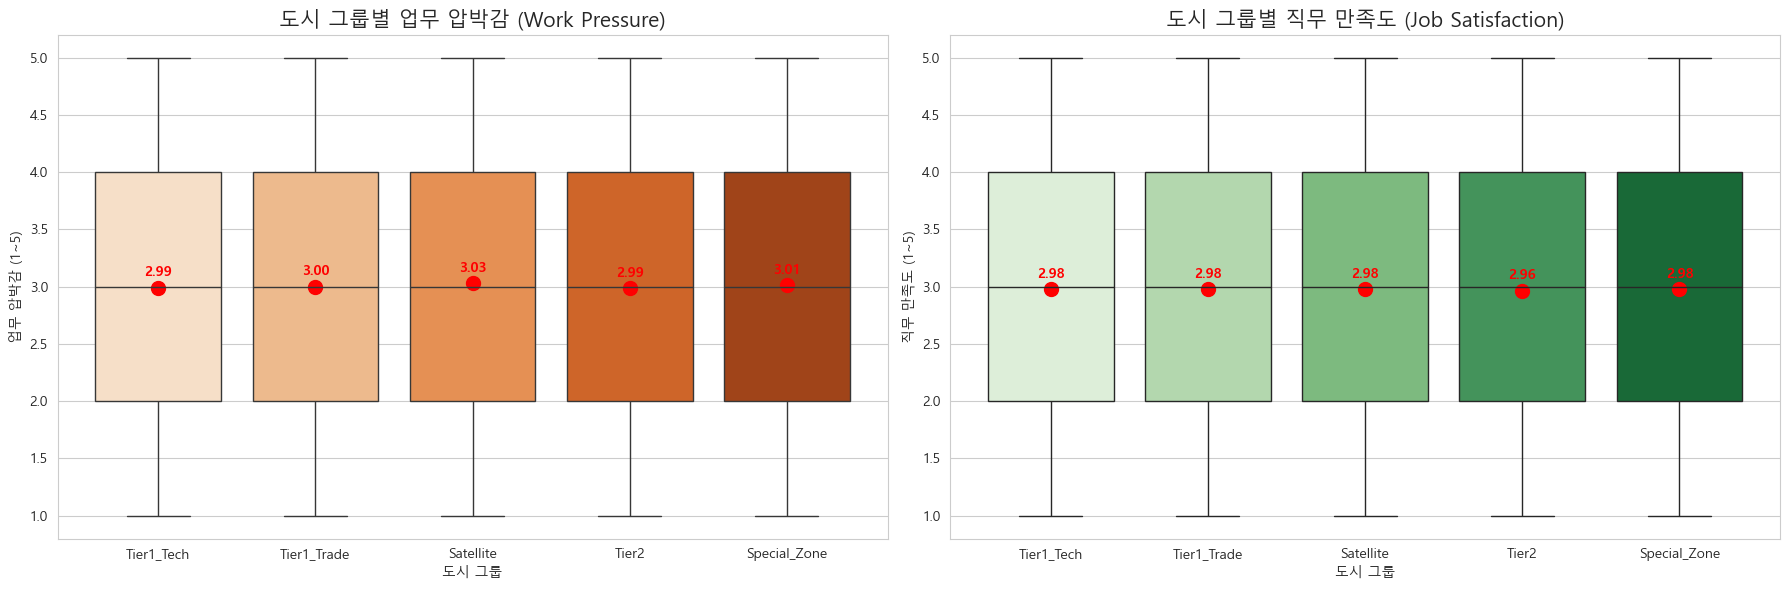

In [ ]:

city_group_map = {
    # Group A: IT & Education Hubs (고압박/경쟁)
    'Bangalore': 'Tier1_Tech', 'Bengaluru': 'Tier1_Tech',
    'Hyderabad': 'Tier1_Tech', 'Pune': 'Tier1_Tech',

    # Group B: Satellite Cities (통근/베드타운)
    'Thane': 'Satellite', 'Kalyan': 'Satellite',
    'Ghaziabad': 'Satellite', 'Faridabad': 'Satellite',
    'Vasai-Virar': 'Satellite',

    # Group C: Established Metros (전통 상업/무역)
    'Kolkata': 'Tier1_Trade', 'Mumbai': 'Tier1_Trade',
    'Ahmedabad': 'Tier1_Trade', 'Chennai': 'Tier1_Trade',
    'Surat': 'Tier1_Trade',

    # Group D: Emerging Tier 2 (지방 거점/성장 도시)
    'Indore': 'Tier2', 'Bhopal': 'Tier2', 'Nagpur': 'Tier2',
    'Nashik': 'Tier2', 'Visakhapatnam': 'Tier2', 'Patna': 'Tier2',
    'Jaipur': 'Tier2', 'Lucknow': 'Tier2', 'Kanpur': 'Tier2',
    'Vadodara': 'Tier2', 'Ludhiana': 'Tier2', 'Agra': 'Tier2',
    'Meerut': 'Tier2', 'Varanasi': 'Tier2',

    # Group E: Special Context
    'Srinagar': 'Special_Zone'
}

# 2. 매핑 적용 및 직장인 데이터 필터링
df['City_Group'] = df['City'].map(city_group_map).fillna('Other')
df_pro_group = df[df['Working Professional or Student'] == 'Working Professional']

# 'Other' 그룹 제외 (분석의 명확성을 위해)
df_pro_group = df_pro_group[df_pro_group['City_Group'] != 'Other']

# 3. 시각화 (Boxplot)
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# 그룹 순서 정의 (비교하기 좋게 정렬)
group_order = ['Tier1_Tech', 'Tier1_Trade', 'Satellite', 'Tier2', 'Special_Zone']

# (1) 그룹별 업무 압박감 (Work Pressure)
sns.boxplot(x='City_Group', y='Work Pressure', data=df_pro_group, order=group_order, palette='Oranges', ax=axes[0])
axes[0].set_title('도시 그룹별 업무 압박감 (Work Pressure)', fontsize=15)
axes[0].set_xlabel('도시 그룹')
axes[0].set_ylabel('업무 압박감 (1~5)')

# 평균값 표시
means1 = df_pro_group.groupby('City_Group')['Work Pressure'].mean().reindex(group_order)
axes[0].plot(range(len(means1)), means1.values, 'ro', markersize=10, label='평균')
for i, v in enumerate(means1.values):
    axes[0].text(i, v + 0.1, f'{v:.2f}', ha='center', color='red', fontweight='bold')


# (2) 그룹별 직무 만족도 (Job Satisfaction)
sns.boxplot(x='City_Group', y='Job Satisfaction', data=df_pro_group, order=group_order, palette='Greens', ax=axes[1])
axes[1].set_title('도시 그룹별 직무 만족도 (Job Satisfaction)', fontsize=15)
axes[1].set_xlabel('도시 그룹')
axes[1].set_ylabel('직무 만족도 (1~5)')

# 평균값 표시
means2 = df_pro_group.groupby('City_Group')['Job Satisfaction'].mean().reindex(group_order)
axes[1].plot(range(len(means2)), means2.values, 'ro', markersize=10, label='평균')
for i, v in enumerate(means2.values):
    axes[1].text(i, v + 0.1, f'{v:.2f}', ha='center', color='red', fontweight='bold')

plt.tight_layout()
plt.show()

🏙️ 도시 등급(Tier)별 데이터 분포:
City_Tier
Tier 2 (Emerging)    102868
Tier 1 (Metros)       37734
Tier 3 (Others)          98
Name: count, dtype: int64


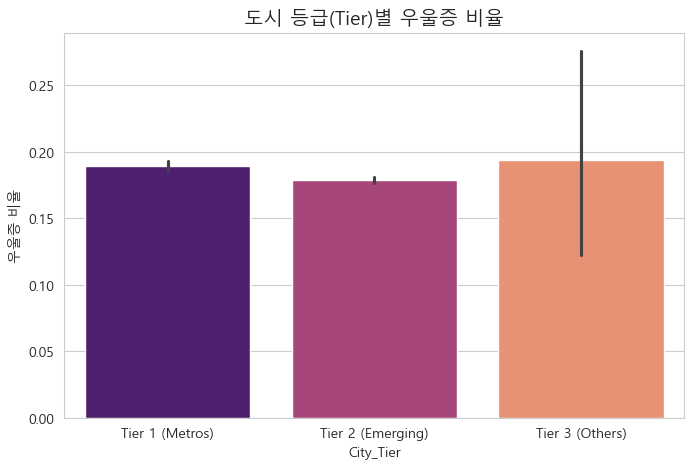

In [ ]:
# 인도 공식 Tier 분류 기준
tier1_cities = [
    'Bangalore', 'Bengaluru', 'Chennai', 'Delhi', 'Hyderabad',
    'Kolkata', 'Mumbai', 'Pune', 'Ahmedabad'
]

tier2_cities = [
    'Agra', 'Ajmer', 'Aligarh', 'Amravati', 'Amritsar', 'Asansol', 'Aurangabad', 'Bareilly',
    'Belgaum', 'Bhavnagar', 'Bhiwandi', 'Bhopal', 'Bhubaneswar', 'Bikaner', 'Bilaspur',
    'Bokaro Steel City', 'Chandigarh', 'Coimbatore', 'Cuttack', 'Dehradun', 'Dhanbad',
    'Bhilai', 'Durgapur', 'Erode', 'Faridabad', 'Firozabad', 'Ghaziabad', 'Gorakhpur',
    'Gulbarga', 'Guntur', 'Gwalior', 'Gurgaon', 'Guwahati', 'Hamirpur', 'Hubli–Dharwad',
    'Indore', 'Jabalpur', 'Jaipur', 'Jalandhar', 'Jammu', 'Jamnagar', 'Jamshedpur',
    'Jhansi', 'Jodhpur', 'Kakinada', 'Kannur', 'Kanpur', 'Kochi', 'Kolhapur', 'Kollam',
    'Kozhikode', 'Kurnool', 'Ludhiana', 'Lucknow', 'Madurai', 'Malappuram', 'Mathura',
    'Mangalore', 'Meerut', 'Moradabad', 'Mysore', 'Nagpur', 'Nanded', 'Nashik', 'Nellore',
    'Noida', 'Patna', 'Pondicherry', 'Purulia', 'Prayagraj', 'Raipur', 'Rajkot',
    'Rajahmundry', 'Ranchi', 'Rourkela', 'Salem', 'Sangli', 'Shimla', 'Siliguri',
    'Solapur', 'Srinagar', 'Surat', 'Thanjavur', 'Thiruvananthapuram', 'Thrissur',
    'Tiruchirappalli', 'Tirunelveli', 'Tiruvannamalai', 'Ujjain', 'Bijapur', 'Vadodara',
    'Varanasi', 'Vasai-Virar City', 'Vijayawada', 'Visakhapatnam', 'Vellore', 'Warangal',
    'Thane', 'Kalyan', 'Vasai-Virar' # 위성 도시들도 보통 Tier 2로 간주하거나 별도 처리
]

def classify_city_tier(city):
    # 데이터에 공백이 있을 수 있으므로 제거
    city = city.strip()
    if city in tier1_cities:
        return 'Tier 1 (Metros)'
    elif city in tier2_cities:
        return 'Tier 2 (Emerging)'
    else:
        return 'Tier 3 (Others)'

# 새로운 컬럼 'City_Tier' 생성
df['City_Tier'] = df['City'].apply(classify_city_tier)

# 결과 확인
print("🏙️ 도시 등급(Tier)별 데이터 분포:")
print(df['City_Tier'].value_counts())

# 시각화
plt.figure(figsize=(8, 5))
sns.barplot(x='City_Tier', y='Depression', data=df, palette='magma', order=['Tier 1 (Metros)', 'Tier 2 (Emerging)', 'Tier 3 (Others)'])
plt.title('도시 등급(Tier)별 우울증 비율', fontsize=14)
plt.ylabel('우울증 비율')
plt.show()

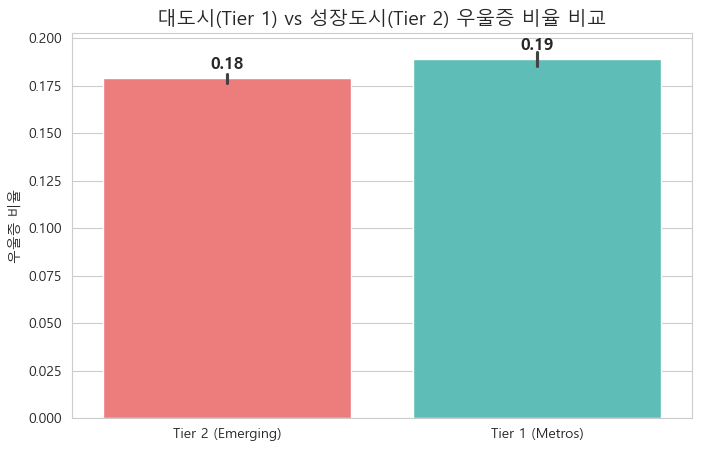

In [ ]:
# 'Tier 3 (Others)'를 제외한 데이터만 필터링
df_filtered = df[df['City_Tier'] != 'Tier 3 (Others)']

# 시각화
plt.figure(figsize=(8, 5))
# 색상 팔레트: Tier 1은 강렬한 빨강(고스트레스 상징), Tier 2는 파랑(상대적 차분함)
sns.barplot(x='City_Tier', y='Depression', data=df_filtered, palette=['#FF6B6B', '#4ECDC4'])

plt.title('대도시(Tier 1) vs 성장도시(Tier 2) 우울증 비율 비교', fontsize=14)
plt.ylabel('우울증 비율')
plt.xlabel('') # x축 라벨은 이미 명확하므로 생략

# 막대 위에 수치 표시
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.005,
            f'{height:.2f}', ha='center', size=12, fontweight='bold')

plt.show()

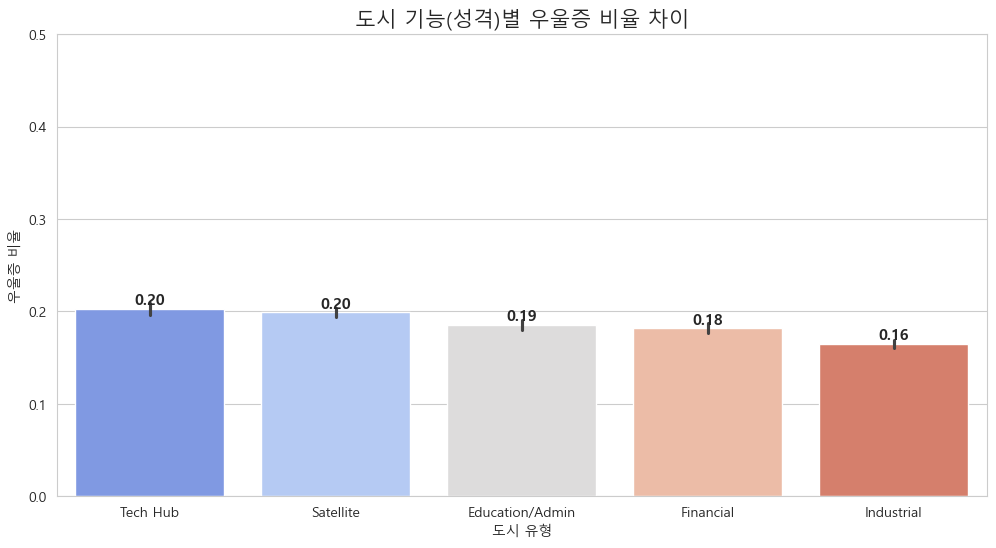

In [ ]:
# 도시 기능별 분류 정의
city_function_map = {
    # 1. Tech & IT Hubs (높은 업무 강도, 성과 압박)
    'Bangalore': 'Tech Hub', 'Bengaluru': 'Tech Hub', 'Hyderabad': 'Tech Hub',
    'Pune': 'Tech Hub', 'Gurgaon': 'Tech Hub', 'Noida': 'Tech Hub',

    # 2. Financial & Trade (경제적 성공 압박, 빈부격차)
    'Mumbai': 'Financial', 'Ahmedabad': 'Financial', 'Surat': 'Financial',
    'Kolkata': 'Financial',

    # 3. Education & Admin (학업/취업 스트레스)
    'Delhi': 'Education/Admin', 'New Delhi': 'Education/Admin',
    'Patna': 'Education/Admin', 'Lucknow': 'Education/Admin',
    'Jaipur': 'Education/Admin', 'Kota': 'Education/Admin',

    # 4. Satellite/Commuter (장거리 출퇴근, 베드타운)
    'Thane': 'Satellite', 'Kalyan': 'Satellite', 'Ghaziabad': 'Satellite',
    'Faridabad': 'Satellite', 'Vasai-Virar': 'Satellite',

    # 5. Industrial/Port (산업 현장)
    'Chennai': 'Industrial', 'Visakhapatnam': 'Industrial', 'Kanpur': 'Industrial',
    'Ludhiana': 'Industrial', 'Nagpur': 'Industrial', 'Vadodara': 'Industrial'
}

# 매핑 적용 (분류 안 된 도시는 'Others'로)
df['City_Function'] = df['City'].map(city_function_map).fillna('Others')

# 'Others' 제외하고 시각화
df_func = df[df['City_Function'] != 'Others']

# 시각화
plt.figure(figsize=(12, 6))
# 우울증 비율 순으로 정렬
order = df_func.groupby('City_Function')['Depression'].mean().sort_values(ascending=False).index

sns.barplot(x='City_Function', y='Depression', data=df_func, order=order, palette='coolwarm')

plt.title('도시 기능(성격)별 우울증 비율 차이', fontsize=15)
plt.ylabel('우울증 비율')
plt.xlabel('도시 유형')
plt.ylim(0, 0.5)

# 수치 표시
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.005,
            f'{height:.2f}', ha='center', size=11, fontweight='bold')

plt.show()


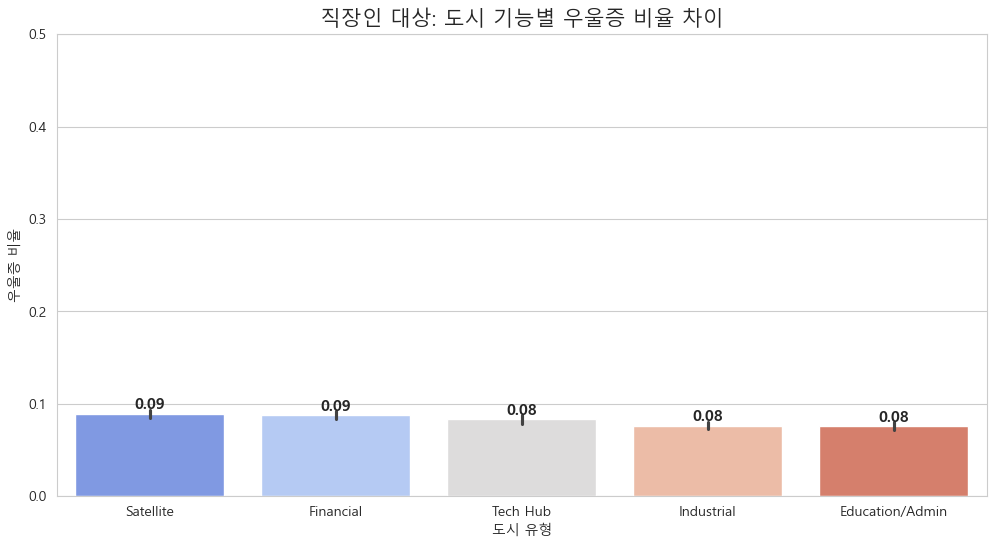

In [ ]:
# 1. 직장인(Working Professional)만 필터링
df_worker = df[df['Working Professional or Student'] == 'Working Professional']

# 2. 도시 기능 매핑 (위에서 만든 city_function_map 사용)
# (만약 city_function_map이 메모리에 없다면 다시 정의해야 합니다)
df_worker['City_Function'] = df_worker['City'].map(city_function_map).fillna('Others')

# 3. 'Others' 제외
df_worker_func = df_worker[df_worker['City_Function'] != 'Others']

# 4. 시각화
plt.figure(figsize=(12, 6))
order = df_worker_func.groupby('City_Function')['Depression'].mean().sort_values(ascending=False).index

sns.barplot(x='City_Function', y='Depression', data=df_worker_func, order=order, palette='coolwarm')

plt.title('직장인 대상: 도시 기능별 우울증 비율 차이', fontsize=15)
plt.ylabel('우울증 비율')
plt.xlabel('도시 유형')
plt.ylim(0, 0.5)

# 수치 표시
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.005,
            f'{height:.2f}', ha='center', size=11, fontweight='bold')

plt.show()

🔍 [우울증과 가장 연관성이 높은 요인 Top 5]
- Academic Pressure: 47.5% 상관관계
- Financial Stress: 22.7% 상관관계
- Work Pressure: 21.7% 상관관계
- Work/Study Hours: 19.2% 상관관계
- CGPA: 2.2% 상관관계


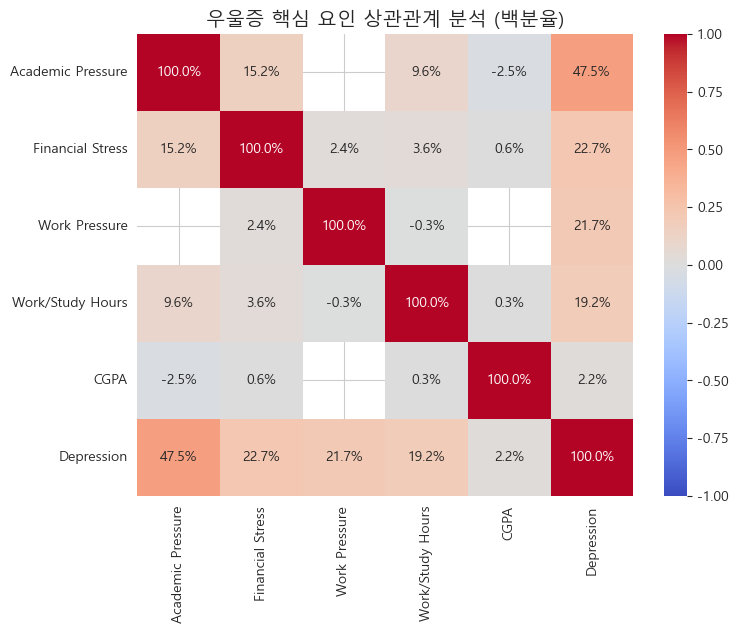

In [ ]:
# 1. 수치형 데이터만 선택하여 상관관계 분석
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
correlation = df[numerical_cols].corr()['Depression'].sort_values(ascending=False)

# 2. 우울증과 상관관계가 높은 상위 5개 요인 추출 (Depression 자신은 제외)
top_factors = correlation.drop('Depression').head(5)

# 3. 결과 출력
print("🔍 [우울증과 가장 연관성이 높은 요인 Top 5]")
for factor, score in top_factors.items():
    print(f"- {factor}: {score*100:.1f}% 상관관계")

# 4. 시각화 (상관관계 히트맵)
plt.figure(figsize=(8, 6))
# 상위 5개 요인 + Depression만 선택
cols_to_plot = top_factors.index.tolist() + ['Depression']
sns.heatmap(df[cols_to_plot].corr(), annot=True, fmt='.1%', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('우울증 핵심 요인 상관관계 분석 (백분율)', fontsize=14)
plt.show()

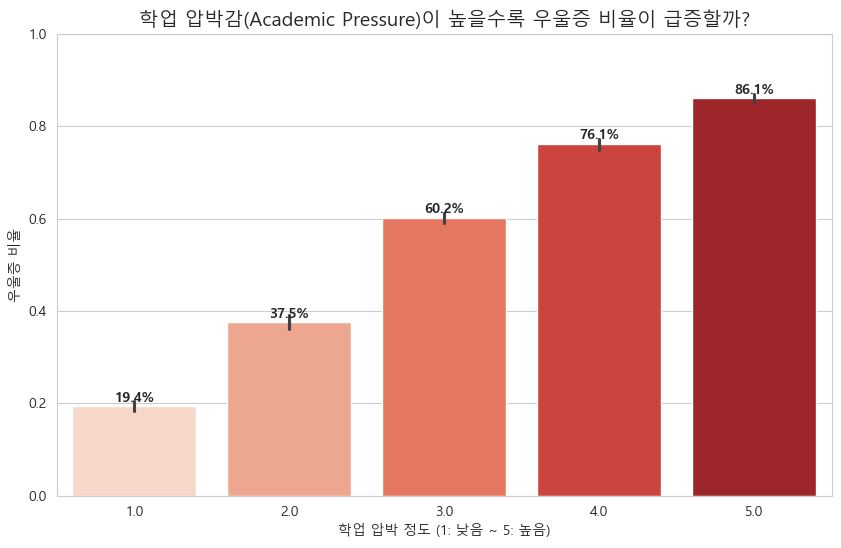

In [ ]:
# 학업 압박(Academic Pressure)에 따른 우울증 비율 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='Academic Pressure', y='Depression', data=df, palette='Reds')

plt.title('학업 압박감(Academic Pressure)이 높을수록 우울증 비율이 급증할까?', fontsize=14)
plt.xlabel('학업 압박 정도 (1: 낮음 ~ 5: 높음)')
plt.ylabel('우울증 비율')
plt.ylim(0, 1.0) # 비율이므로 0~1 사이

# 막대 위에 수치 표시
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.01,
            f'{height*100:.1f}%', ha='center', fontweight='bold')

plt.show()

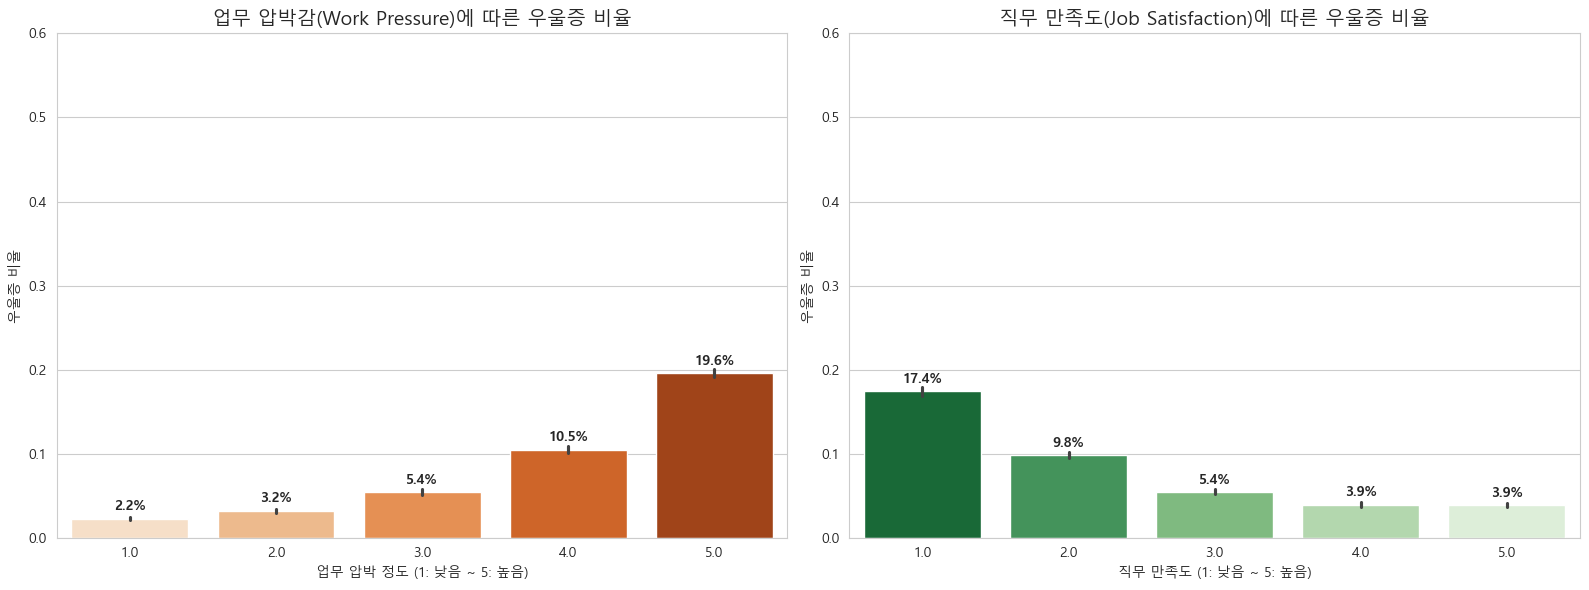

In [ ]:
# 1. 직장인 데이터만 추출
df_pro = df[df['Working Professional or Student'] == 'Working Professional']

# 2. 시각화 (두 개의 그래프를 나란히 배치)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# (1) 업무 압박(Work Pressure)과 우울증
sns.barplot(x='Work Pressure', y='Depression', data=df_pro, palette='Oranges', ax=axes[0])
axes[0].set_title('업무 압박감(Work Pressure)에 따른 우울증 비율', fontsize=14)
axes[0].set_xlabel('업무 압박 정도 (1: 낮음 ~ 5: 높음)')
axes[0].set_ylabel('우울증 비율')
axes[0].set_ylim(0, 0.6)

# 수치 표시
for p in axes[0].patches:
    height = p.get_height()
    axes[0].text(p.get_x() + p.get_width() / 2., height + 0.01,
                 f'{height*100:.1f}%', ha='center', fontweight='bold')

# (2) 직무 만족도(Job Satisfaction)와 우울증
# 만족도가 낮을수록(1점) 우울증이 높을 것으로 예상됨
sns.barplot(x='Job Satisfaction', y='Depression', data=df_pro, palette='Greens_r', ax=axes[1]) # Greens_r: 역순(진한 초록이 낮은 점수)
axes[1].set_title('직무 만족도(Job Satisfaction)에 따른 우울증 비율', fontsize=14)
axes[1].set_xlabel('직무 만족도 (1: 낮음 ~ 5: 높음)')
axes[1].set_ylabel('우울증 비율')
axes[1].set_ylim(0, 0.6)

# 수치 표시
for p in axes[1].patches:
    height = p.get_height()
    axes[1].text(p.get_x() + p.get_width() / 2., height + 0.01,
                 f'{height*100:.1f}%', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

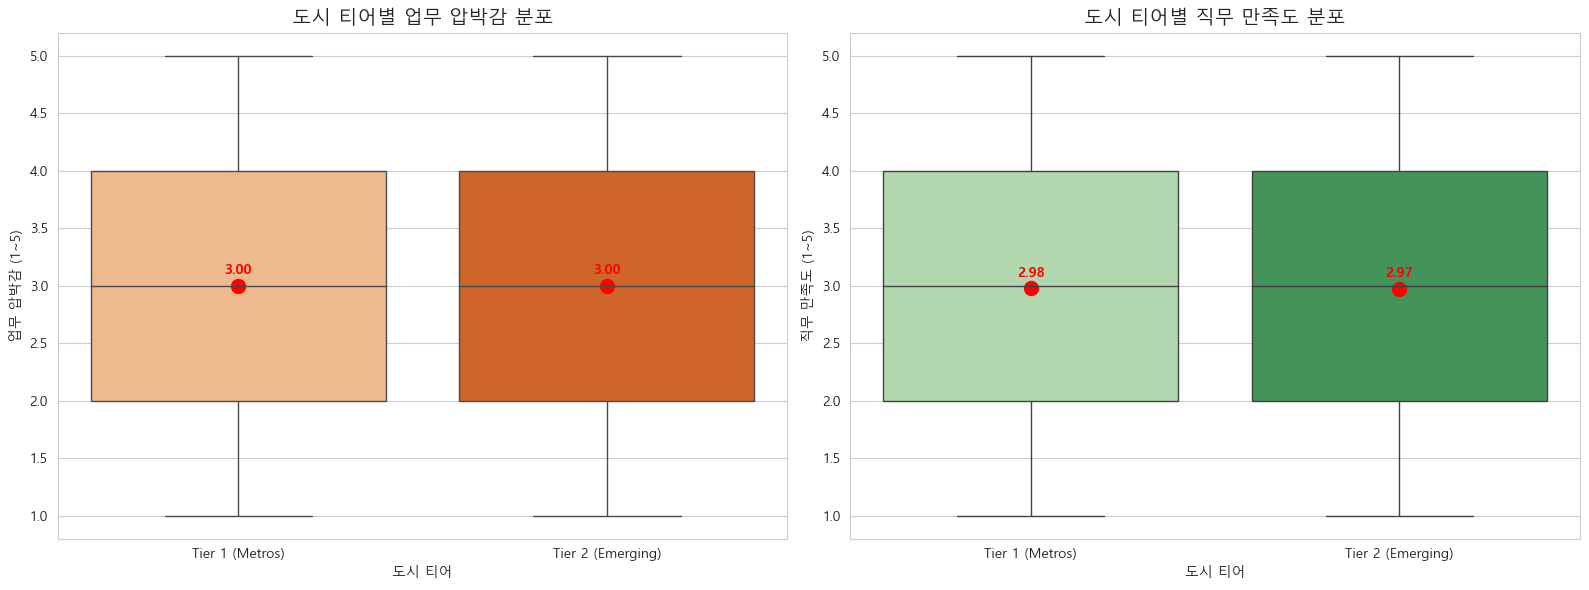

In [ ]:
# 1. 직장인 데이터만 추출 (이미 df_pro가 있다면 생략 가능)
df_pro = df[df['Working Professional or Student'] == 'Working Professional']

# 2. 'Others' 제외 (분석의 명확성을 위해)
df_pro_tier = df_pro[df_pro['City_Tier'] != 'Tier 3 (Others)']

# 3. 시각화 (Boxplot으로 분포 비교)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# (1) 티어별 업무 압박감 (Work Pressure)
sns.boxplot(x='City_Tier', y='Work Pressure', data=df_pro_tier, palette='Oranges', ax=axes[0], order=['Tier 1 (Metros)', 'Tier 2 (Emerging)'])
axes[0].set_title('도시 티어별 업무 압박감 분포', fontsize=14)
axes[0].set_xlabel('도시 티어')
axes[0].set_ylabel('업무 압박감 (1~5)')

# 평균값 표시 (빨간 점)
means1 = df_pro_tier.groupby('City_Tier')['Work Pressure'].mean()
# order에 맞춰 평균값 추출
means1 = means1.reindex(['Tier 1 (Metros)', 'Tier 2 (Emerging)'])
axes[0].plot(range(len(means1)), means1.values, 'ro', markersize=10, label='평균')
# 평균값 텍스트 표시
for i, v in enumerate(means1.values):
    axes[0].text(i, v + 0.1, f'{v:.2f}', ha='center', color='red', fontweight='bold')


# (2) 티어별 직무 만족도 (Job Satisfaction)
sns.boxplot(x='City_Tier', y='Job Satisfaction', data=df_pro_tier, palette='Greens', ax=axes[1], order=['Tier 1 (Metros)', 'Tier 2 (Emerging)'])
axes[1].set_title('도시 티어별 직무 만족도 분포', fontsize=14)
axes[1].set_xlabel('도시 티어')
axes[1].set_ylabel('직무 만족도 (1~5)')

# 평균값 표시 (빨간 점)
means2 = df_pro_tier.groupby('City_Tier')['Job Satisfaction'].mean()
means2 = means2.reindex(['Tier 1 (Metros)', 'Tier 2 (Emerging)'])
axes[1].plot(range(len(means2)), means2.values, 'ro', markersize=10, label='평균')
# 평균값 텍스트 표시
for i, v in enumerate(means2.values):
    axes[1].text(i, v + 0.1, f'{v:.2f}', ha='center', color='red', fontweight='bold')

plt.tight_layout()
plt.show()

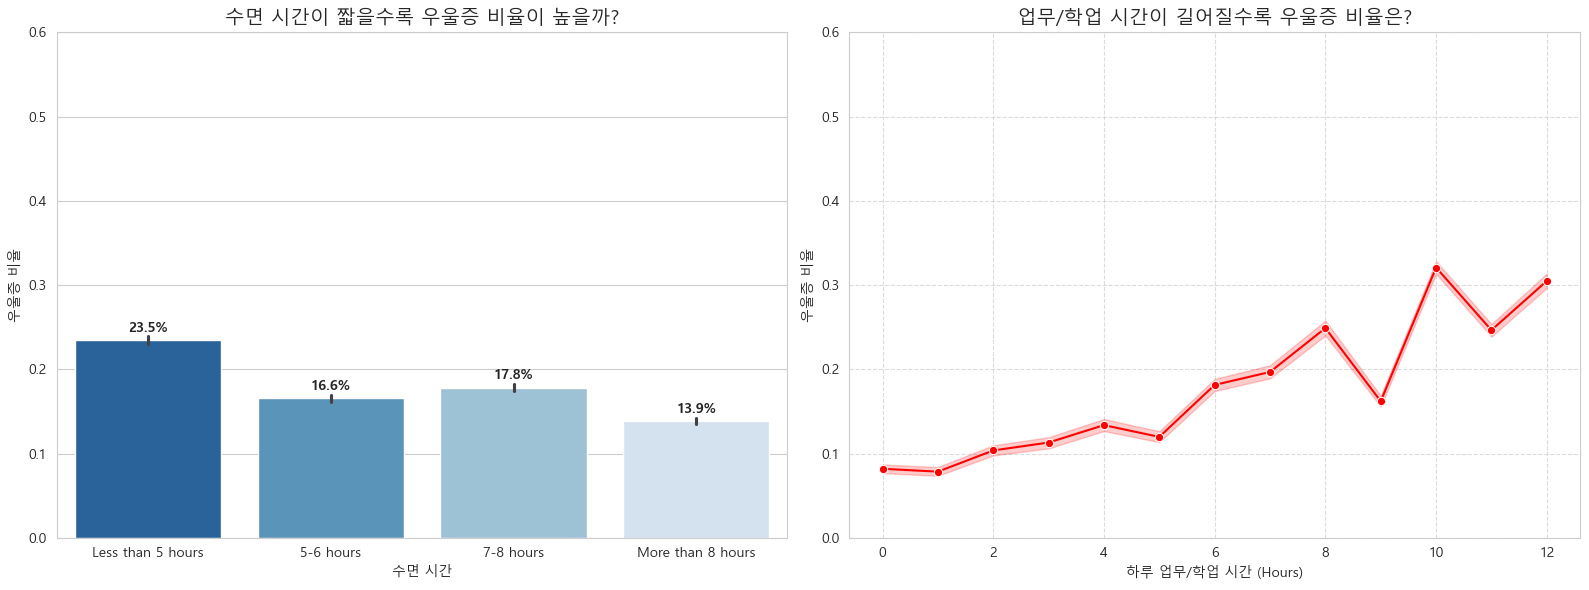

In [ ]:
# 1. 수면 시간 순서 정의 (그래프 정렬용)
sleep_order = ['Less than 5 hours', '5-6 hours', '7-8 hours', 'More than 8 hours']

# 2. 시각화
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# (1) 수면 시간별 우울증 비율
sns.barplot(x='Sleep Duration', y='Depression', data=df, order=sleep_order, palette='Blues_r', ax=axes[0])
axes[0].set_title('수면 시간이 짧을수록 우울증 비율이 높을까?', fontsize=14)
axes[0].set_xlabel('수면 시간')
axes[0].set_ylabel('우울증 비율')
axes[0].set_ylim(0, 0.6) # 비율 범위 통일

# 수치 표시
for p in axes[0].patches:
    height = p.get_height()
    axes[0].text(p.get_x() + p.get_width() / 2., height + 0.01,
                 f'{height*100:.1f}%', ha='center', fontweight='bold')


# (2) 업무/학업 시간별 우울증 비율 (Line Plot으로 추세 확인)
# 시간은 연속형 변수이므로 선 그래프가 적합
sns.lineplot(x='Work/Study Hours', y='Depression', data=df, marker='o', color='red', ax=axes[1])
axes[1].set_title('업무/학업 시간이 길어질수록 우울증 비율은?', fontsize=14)
axes[1].set_xlabel('하루 업무/학업 시간 (Hours)')
axes[1].set_ylabel('우울증 비율')
axes[1].set_ylim(0, 0.6)
axes[1].grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

⏰ 업무/학업 시간별 응답자 수:
Work/Study Hours
0.0     12066
1.0      9802
2.0     10595
3.0      9474
4.0      9065
5.0      9337
6.0     10432
7.0      9872
8.0      8906
9.0     12711
10.0    14199
11.0    12832
12.0    11409
Name: count, dtype: int64


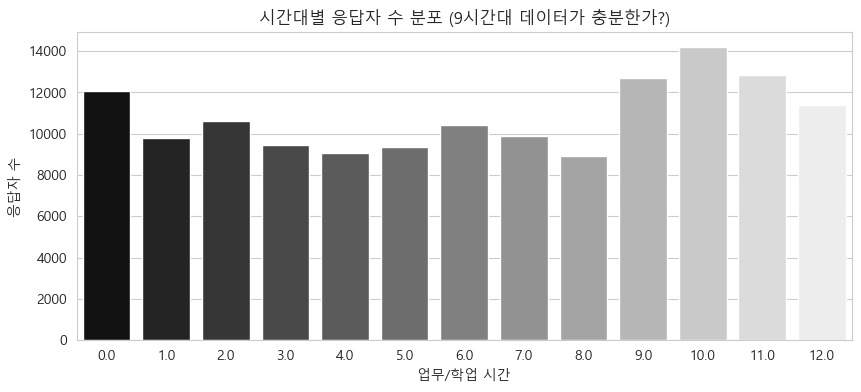

In [ ]:
# 업무/학업 시간별 데이터 개수(응답자 수) 확인
hours_counts = df['Work/Study Hours'].value_counts().sort_index()

print("⏰ 업무/학업 시간별 응답자 수:")
print(hours_counts)

# 시각화로 데이터 개수 확인 (막대 그래프)
plt.figure(figsize=(10, 4))
sns.barplot(x=hours_counts.index, y=hours_counts.values, palette='gray')
plt.title('시간대별 응답자 수 분포 (9시간대 데이터가 충분한가?)')
plt.xlabel('업무/학업 시간')
plt.ylabel('응답자 수')
plt.show()

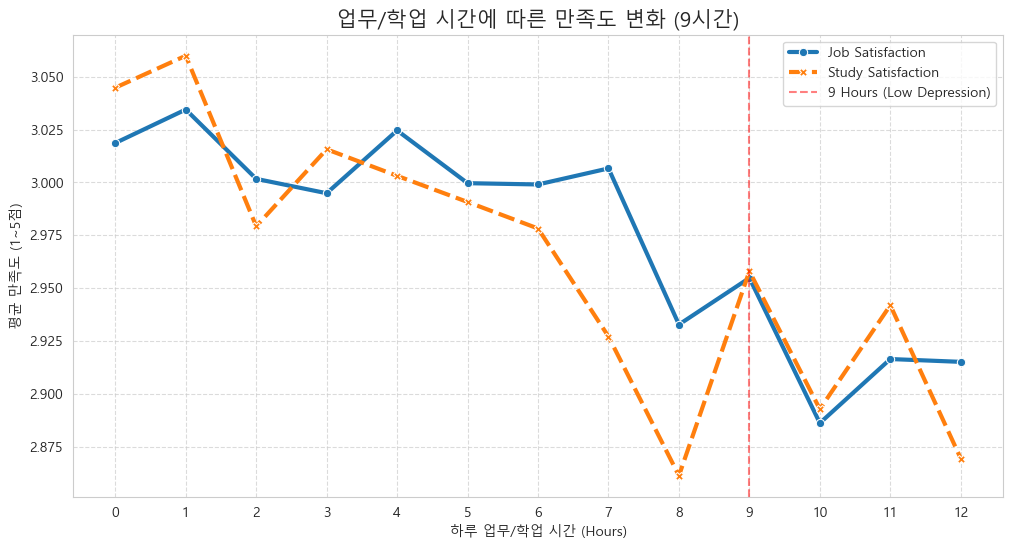

🧐 8~10시간 구간 만족도 비교:


,Job Satisfaction,Study Satisfaction
Work/Study Hours,,
8.0,2.932781,2.861299
9.0,2.954801,2.958004
10.0,2.886190,2.892773


In [ ]:
# 시간대별 평균 만족도 계산 (직장인 vs 학생)
satisfaction_by_hours = df.groupby('Work/Study Hours')[['Job Satisfaction', 'Study Satisfaction']].mean()

# 시각화
plt.figure(figsize=(12, 6))

# 두 개의 선 그래프 그리기
sns.lineplot(data=satisfaction_by_hours, markers=True, linewidth=3)

# 9시간 구간 강조 (수직선)
plt.axvline(x=9, color='red', linestyle='--', alpha=0.5, label='9 Hours (Low Depression)')

plt.title('업무/학업 시간에 따른 만족도 변화 (9시간)', fontsize=15)
plt.xlabel('하루 업무/학업 시간 (Hours)')
plt.ylabel('평균 만족도 (1~5점)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(range(0, 13)) # 0~12시간 x축 표시
plt.legend()

plt.show()

# 수치로 정확히 비교 (8시간 vs 9시간 vs 10시간)
print("🧐 8~10시간 구간 만족도 비교:")
display(satisfaction_by_hours.loc[8:10])

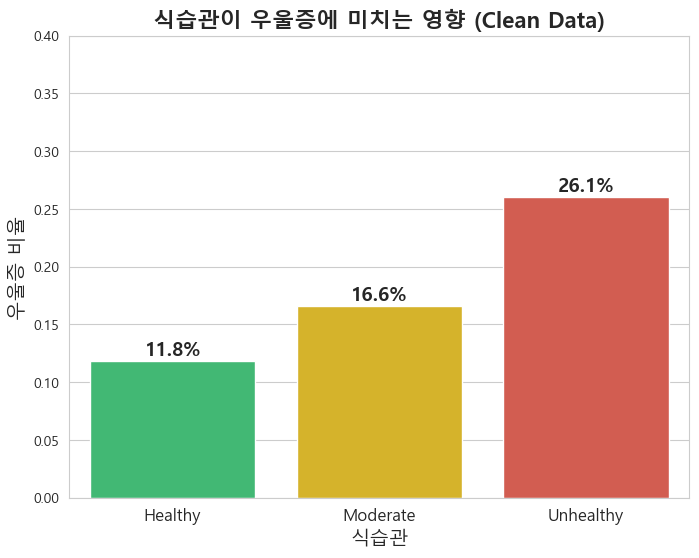

In [ ]:
# 1. 유효한 식습관 데이터만 남기기 (이상한 값 제거)
valid_diets = ['Healthy', 'Moderate', 'Unhealthy']
df_diet_clean = df[df['Dietary Habits'].isin(valid_diets)]

# 2. 식습관별 우울증 비율 계산
diet_depression = df_diet_clean.groupby('Dietary Habits')['Depression'].mean().reindex(valid_diets)

# 3. 시각화 (깔끔하게 다시 그리기)
plt.figure(figsize=(8, 6))

# 색상: Healthy(초록) -> Moderate(노랑) -> Unhealthy(빨강)
colors = ['#2ecc71', '#f1c40f', '#e74c3c']
ax = sns.barplot(x=diet_depression.index, y=diet_depression.values, palette=colors)

plt.title('식습관이 우울증에 미치는 영향 (Clean Data)', fontsize=16, fontweight='bold')
plt.xlabel('식습관', fontsize=14)
plt.ylabel('우울증 비율', fontsize=14)
plt.ylim(0, 0.4) # 비율 범위 적절히 조절
plt.xticks(fontsize=12) # x축 글씨 크기 확대

# 막대 위에 수치 표시 (크고 잘 보이게)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.005,
            f'{height*100:.1f}%', ha='center', fontweight='bold', fontsize=14)

plt.show()

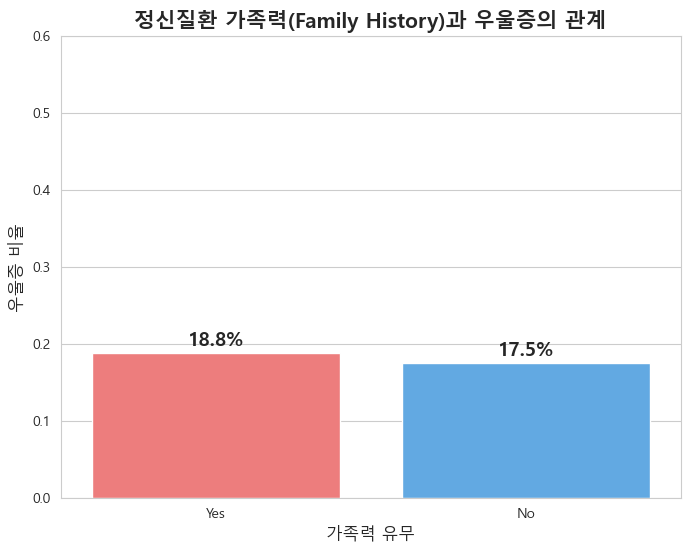

🧬 가족력 유무별 우울증 비율:
Family History of Mental Illness
Yes    18.81%
No     17.54%
Name: Depression, dtype: object


In [ ]:
# 1. 가족력 유무에 따른 우울증 비율 계산
family_history_depression = df.groupby('Family History of Mental Illness')['Depression'].mean().sort_values(ascending=False)

# 2. 시각화
plt.figure(figsize=(8, 6))

# 색상: 가족력 있음(Yes)은 경고의 의미로 붉은색, 없음(No)은 파란색
colors = ['#ff6b6b', '#4dabf7']
ax = sns.barplot(x=family_history_depression.index, y=family_history_depression.values, palette=colors)

plt.title('정신질환 가족력(Family History)과 우울증의 관계', fontsize=15, fontweight='bold')
plt.xlabel('가족력 유무', fontsize=12)
plt.ylabel('우울증 비율', fontsize=12)
plt.ylim(0, 0.6) # 비율 범위 통일

# 막대 위에 수치 표시
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.01,
            f'{height*100:.1f}%', ha='center', fontweight='bold', fontsize=14)

plt.show()

# 수치 출력
print("🧬 가족력 유무별 우울증 비율:")
print((family_history_depression * 100).round(2).astype(str) + '%')

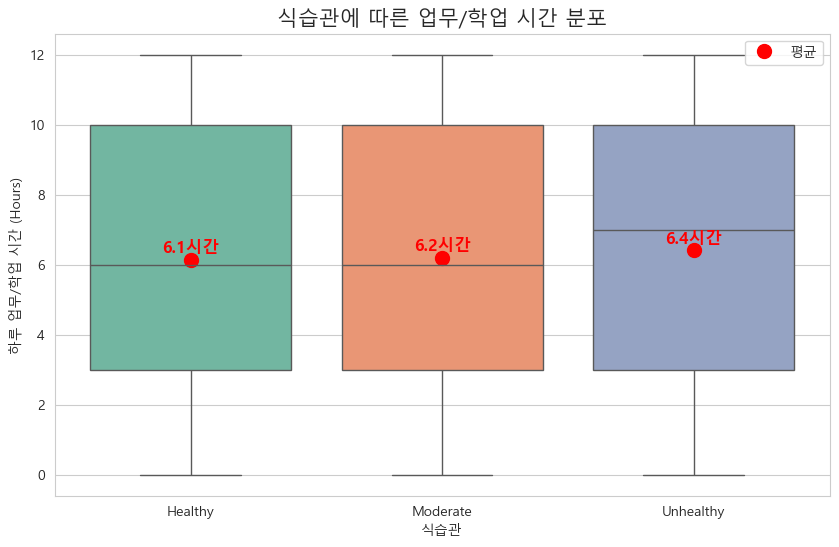

In [ ]:
# 1. 유효한 식습관 데이터만 필터링 (Clean Data 사용)
valid_diets = ['Healthy', 'Moderate', 'Unhealthy']
df_clean = df[df['Dietary Habits'].isin(valid_diets)]

# 2. 식습관별 평균 업무/학업 시간 계산
hours_by_diet = df_clean.groupby('Dietary Habits')['Work/Study Hours'].mean().reindex(valid_diets)

# 3. 시각화 (Boxplot으로 분포 비교가 더 정확함)
plt.figure(figsize=(10, 6))

# 순서 지정: Healthy -> Moderate -> Unhealthy
sns.boxplot(x='Dietary Habits', y='Work/Study Hours', data=df_clean, order=valid_diets, palette='Set2')

plt.title('식습관에 따른 업무/학업 시간 분포', fontsize=15)
plt.xlabel('식습관')
plt.ylabel('하루 업무/학업 시간 (Hours)')

# 평균값 표시 (빨간 점)
means = hours_by_diet.values
plt.plot(range(len(means)), means, 'ro', markersize=10, label='평균')
for i, v in enumerate(means):
    plt.text(i, v + 0.2, f'{v:.1f}시간', ha='center', color='red', fontweight='bold', fontsize=12)

plt.legend()
plt.show()

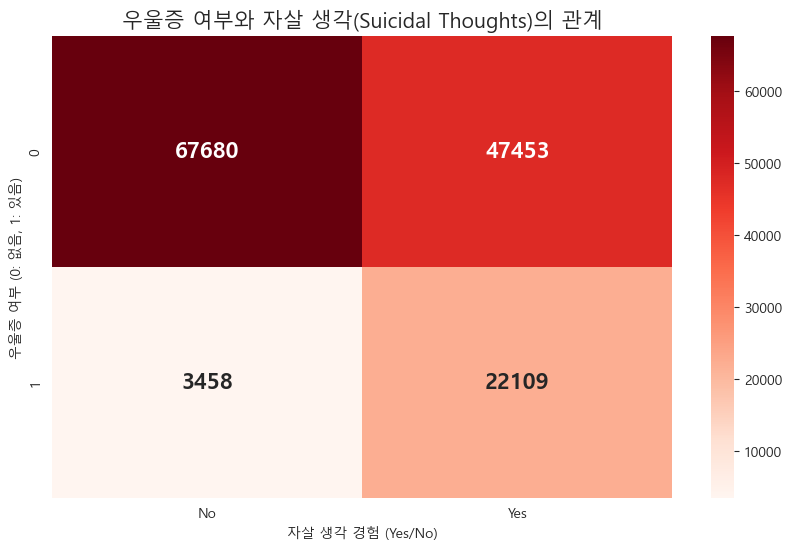

🚨 우울증 환자 중 자살 생각 비율:
Have you ever had suicidal thoughts ?
Yes    86.47%
No     13.53%
Name: proportion, dtype: object


In [ ]:
# 1. 교차 분석표(Crosstab) 생성
suicide_depression = pd.crosstab(df['Depression'], df['Have you ever had suicidal thoughts ?'])

# 2. 시각화 (히트맵으로 빈도 확인)
plt.figure(figsize=(10, 6))
sns.heatmap(suicide_depression, annot=True, fmt='d', cmap='Reds', annot_kws={"size": 16, "weight": "bold"})

plt.title('우울증 여부와 자살 생각(Suicidal Thoughts)의 관계', fontsize=15)
plt.xlabel('자살 생각 경험 (Yes/No)')
plt.ylabel('우울증 여부 (0: 없음, 1: 있음)')

plt.show()

# 3. 비율 계산 (우울증 환자 중 자살 생각 비율)
depression_suicide_rate = df[df['Depression'] == 1]['Have you ever had suicidal thoughts ?'].value_counts(normalize=True)
print("🚨 우울증 환자 중 자살 생각 비율:")
print((depression_suicide_rate * 100).round(2).astype(str) + '%')

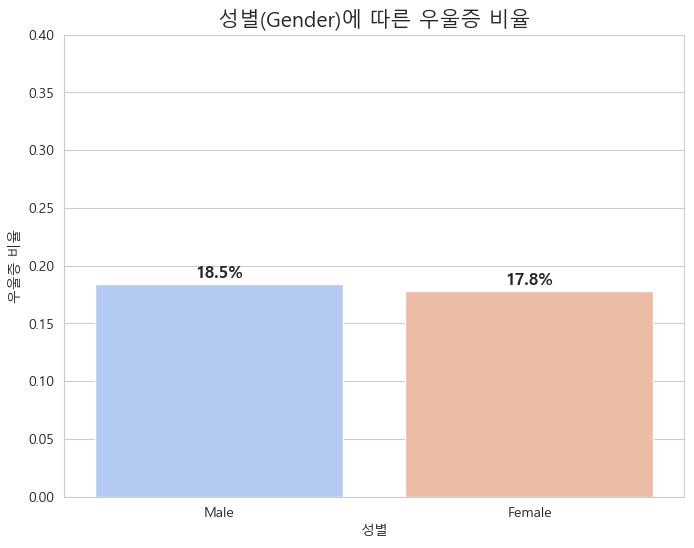

👫 성별 우울증 비율:
Gender
Male      18.46%
Female    17.82%
Name: Depression, dtype: object


In [ ]:
# 1. 성별 우울증 비율 계산
gender_depression = df.groupby('Gender')['Depression'].mean().sort_values(ascending=False)

# 2. 시각화
plt.figure(figsize=(8, 6))

sns.barplot(x=gender_depression.index, y=gender_depression.values, palette='coolwarm')

plt.title('성별(Gender)에 따른 우울증 비율', fontsize=15)
plt.xlabel('성별')
plt.ylabel('우울증 비율')
plt.ylim(0, 0.4) # 비율 범위 설정

# 막대 위에 수치 표시
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.005,
            f'{height*100:.1f}%', ha='center', fontweight='bold', fontsize=12)

plt.show()

# 수치 출력
print("👫 성별 우울증 비율:")
print((gender_depression * 100).round(2).astype(str) + '%')

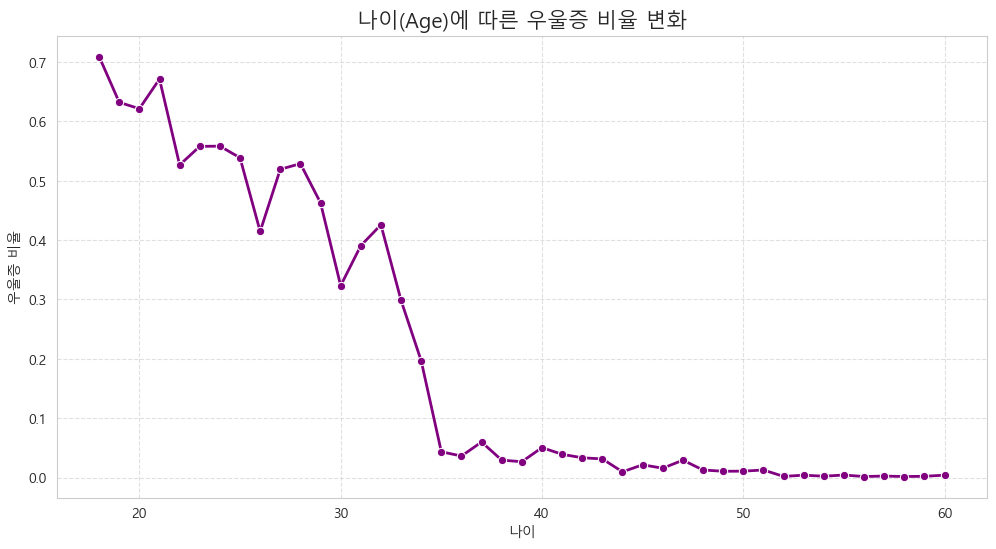

📊 연령대별 우울증 비율:
Age_Group
Teens    0.678261
20s      0.544636
30s      0.157758
40s      0.024338
50s      0.004361
60+      0.003998
Name: Depression, dtype: float64


In [ ]:
# 1. 나이별 우울증 비율 계산
age_depression = df.groupby('Age')['Depression'].mean()

# 2. 시각화 (Line Plot으로 전체적인 추세 확인)
plt.figure(figsize=(12, 6))

# 선 그래프 그리기
sns.lineplot(x=age_depression.index, y=age_depression.values, marker='o', color='purple', linewidth=2)

plt.title('나이(Age)에 따른 우울증 비율 변화', fontsize=15)
plt.xlabel('나이')
plt.ylabel('우울증 비율')
plt.grid(True, linestyle='--', alpha=0.6) # 격자선 추가

plt.show()

# (선택) 구간별로 묶어서 보고 싶다면 아래 코드 사용
# 10대, 20대, 30대... 등으로 나누기
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 19, 29, 39, 49, 59, 100], labels=['Teens', '20s', '30s', '40s', '50s', '60+'])
print("📊 연령대별 우울증 비율:")
print(df.groupby('Age_Group')['Depression'].mean().sort_values(ascending=False))

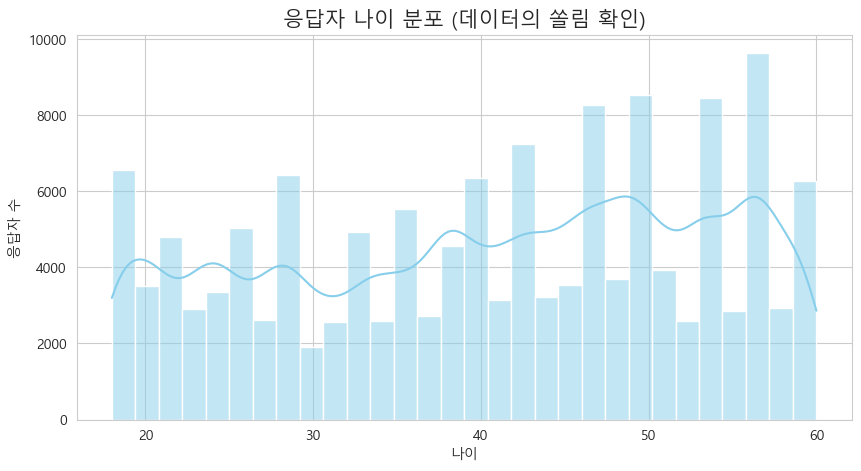

전체 응답자 140700명 중 40세 이상은 77418명 (55.02%) 입니다.


In [ ]:
# 나이대별 응답자 수 확인 (히스토그램)
plt.figure(figsize=(10, 5))
sns.histplot(df['Age'], bins=30, kde=True, color='skyblue')

plt.title('응답자 나이 분포 (데이터의 쏠림 확인)', fontsize=15)
plt.xlabel('나이')
plt.ylabel('응답자 수')
plt.show()

# 구체적인 숫자 확인 (40세 이상 데이터 개수)
over_40 = df[df['Age'] >= 40].shape[0]
total = df.shape[0]
print(f"전체 응답자 {total}명 중 40세 이상은 {over_40}명 ({over_40/total*100:.2f}%) 입니다.")

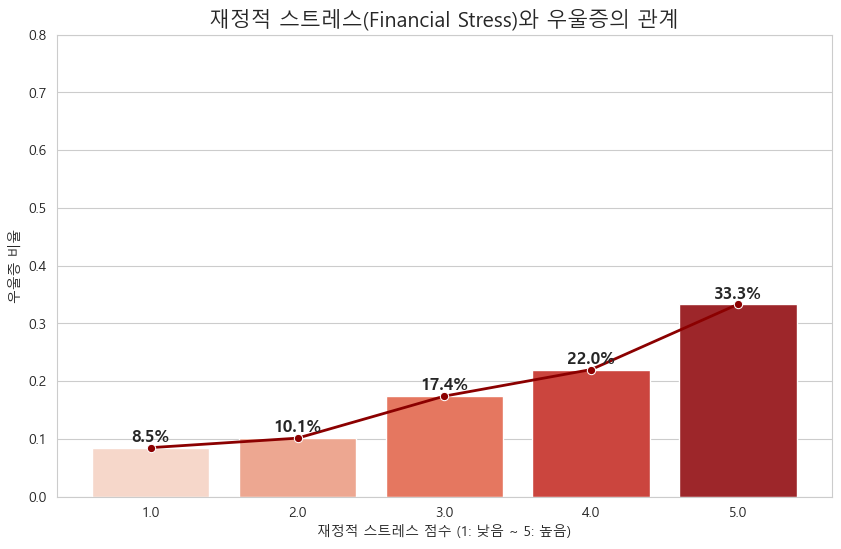

💸 재정적 스트레스별 우울증 비율:
Financial Stress
1.0      8.5%
2.0    10.14%
3.0    17.42%
4.0    22.02%
5.0    33.32%
Name: Depression, dtype: object


In [ ]:
# 1. 재정적 스트레스 점수별 우울증 비율 계산
financial_depression = df.groupby('Financial Stress')['Depression'].mean()

# 2. 시각화 (Bar Plot + Line Plot)
plt.figure(figsize=(10, 6))

# 막대 그래프 (비율)
sns.barplot(x=financial_depression.index, y=financial_depression.values, palette='Reds')

# 선 그래프 (추세선) - 빨간색 실선으로 강조
sns.lineplot(x=range(len(financial_depression)), y=financial_depression.values, marker='o', color='darkred', linewidth=2)

plt.title('재정적 스트레스(Financial Stress)와 우울증의 관계', fontsize=15)
plt.xlabel('재정적 스트레스 점수 (1: 낮음 ~ 5: 높음)')
plt.ylabel('우울증 비율')
plt.ylim(0, 0.8) # 비율 범위

# 막대 위에 수치 표시
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.01,
            f'{height*100:.1f}%', ha='center', fontweight='bold', fontsize=12)

plt.show()

# 수치 출력
print("💸 재정적 스트레스별 우울증 비율:")
print((financial_depression * 100).round(2).astype(str) + '%')

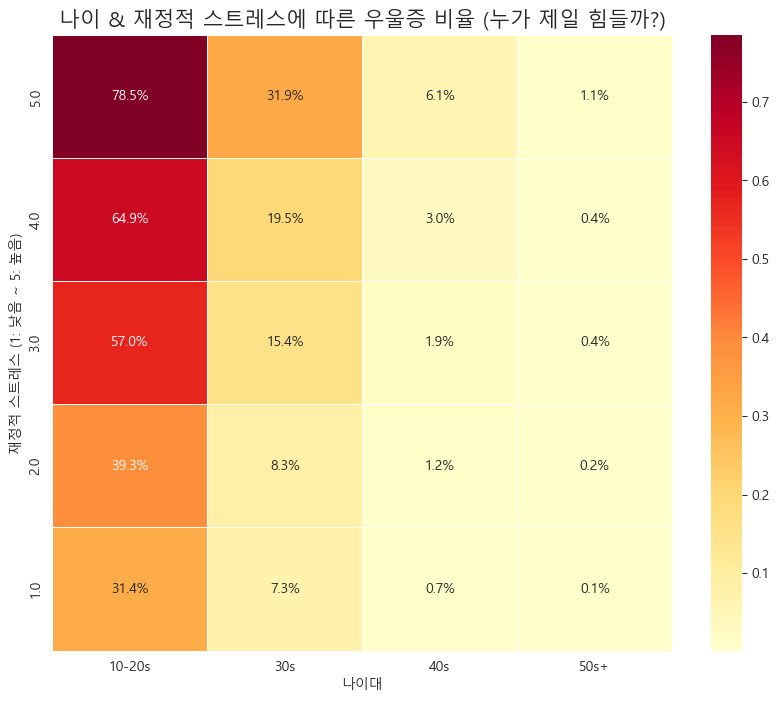

In [ ]:
# 1. 나이를 10년 단위로 그룹화
df['Age_Group'] = pd.cut(df['Age'], bins=[10, 29, 39, 49, 60], labels=['10-20s', '30s', '40s', '50s+'])

# 2. 나이 그룹 & 재정 스트레스별 우울증 비율 계산 (Pivot Table)
age_financial_depression = df.pivot_table(index='Financial Stress', columns='Age_Group', values='Depression', aggfunc='mean')

# 3. 시각화 (히트맵으로 패턴 확인)
plt.figure(figsize=(10, 8))
sns.heatmap(age_financial_depression, annot=True, fmt='.1%', cmap='YlOrRd', linewidths=.5)

plt.title('나이 & 재정적 스트레스에 따른 우울증 비율 (누가 제일 힘들까?)', fontsize=15)
plt.xlabel('나이대')
plt.ylabel('재정적 스트레스 (1: 낮음 ~ 5: 높음)')
plt.gca().invert_yaxis() # y축 순서 뒤집기 (1이 아래로, 5가 위로 가도록)

plt.show()

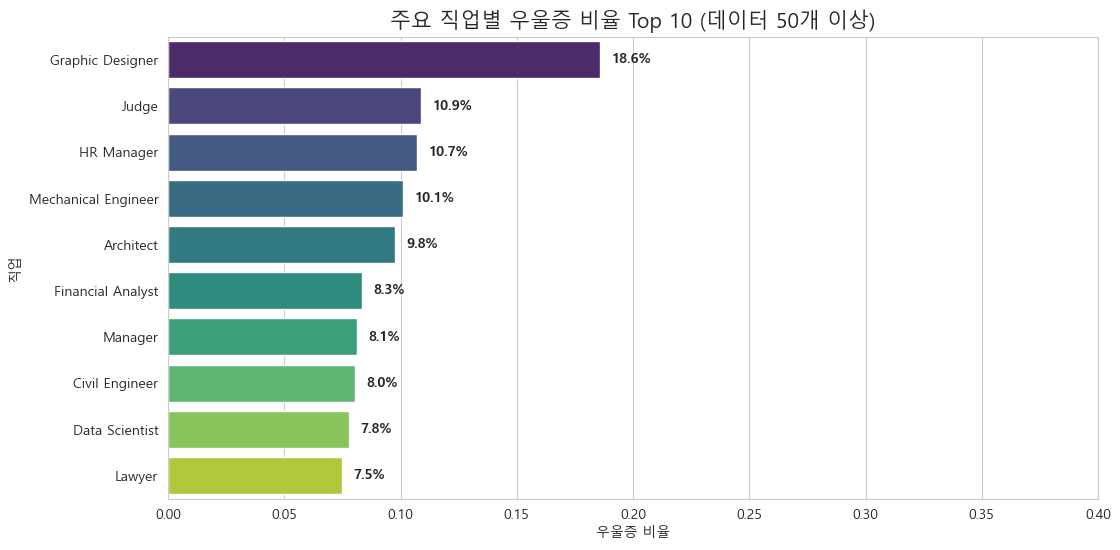

In [ ]:
# 1. 직업별 데이터 개수 확인
job_counts = df_pro['Profession'].value_counts()

# 2. 데이터가 50개 이상인 직업만 선택 (유의미한 통계를 위해)
valid_jobs = job_counts[job_counts >= 50].index
df_valid_jobs = df_pro[df_pro['Profession'].isin(valid_jobs)]

# 3. 다시 우울증 비율 계산 및 정렬
job_depression_clean = df_valid_jobs.groupby('Profession')['Depression'].mean().sort_values(ascending=False).head(10)

# 4. 시각화 (Clean Version)
plt.figure(figsize=(12, 6))
sns.barplot(x=job_depression_clean.values, y=job_depression_clean.index, palette='viridis')

plt.title('주요 직업별 우울증 비율 Top 10 (데이터 50개 이상)', fontsize=15)
plt.xlabel('우울증 비율')
plt.ylabel('직업')
plt.xlim(0, 0.4) # 비율 범위 조절

# 수치 표시
ax = plt.gca()
for i, v in enumerate(job_depression_clean.values):
    ax.text(v + 0.005, i, f'{v*100:.1f}%', va='center', fontweight='bold')

plt.show()

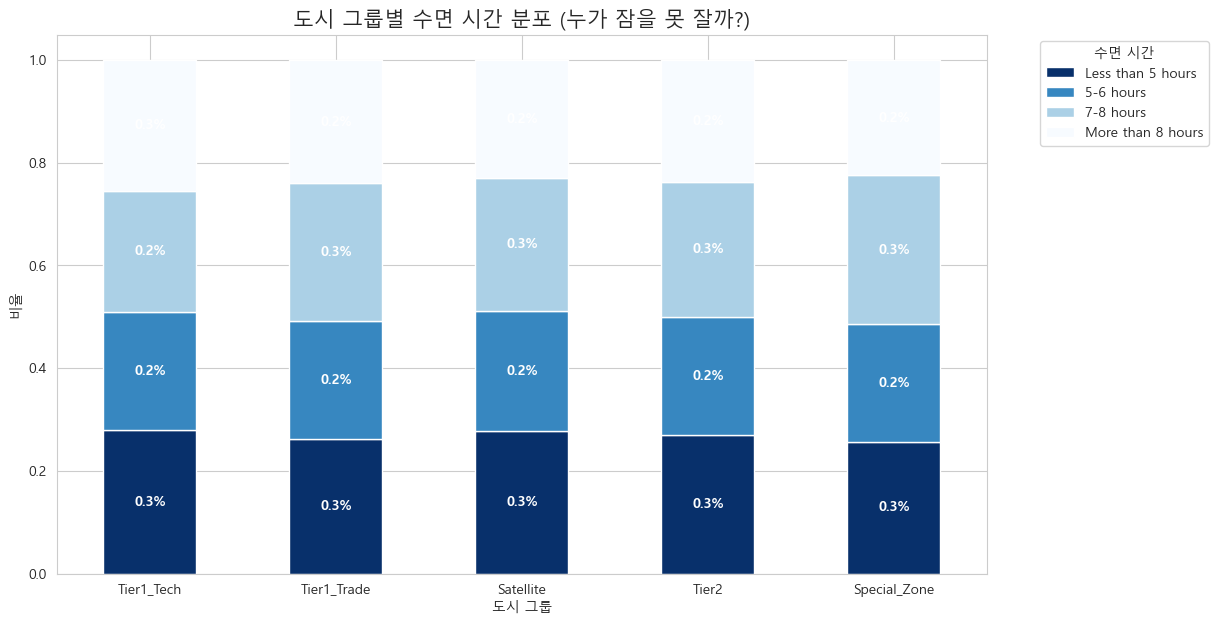

In [ ]:
# 1. 수면 시간 순서 정의
sleep_order = ['Less than 5 hours', '5-6 hours', '7-8 hours', 'More than 8 hours']

# 2. 도시 그룹별 수면 시간 분포 계산 (비율)
# crosstab을 사용하여 도시별로 각 수면 시간 응답 비율을 구함
city_sleep = pd.crosstab(df_pro['City_Group'], df_pro['Sleep Duration'], normalize='index')
city_sleep = city_sleep[sleep_order] # 순서 정렬
city_sleep = city_sleep.reindex(['Tier1_Tech', 'Tier1_Trade', 'Satellite', 'Tier2', 'Special_Zone']) # 도시 순서 정렬

# 3. 시각화 (Stacked Bar Chart)
ax = city_sleep.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='Blues_r')

plt.title('도시 그룹별 수면 시간 분포 (누가 잠을 못 잘까?)', fontsize=15)
plt.xlabel('도시 그룹')
plt.ylabel('비율')
plt.legend(title='수면 시간', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)

# 막대 안에 비율(%) 표시
for c in ax.containers:
    ax.bar_label(c, fmt='%.1f%%', label_type='center', color='white', fontweight='bold')

plt.show()

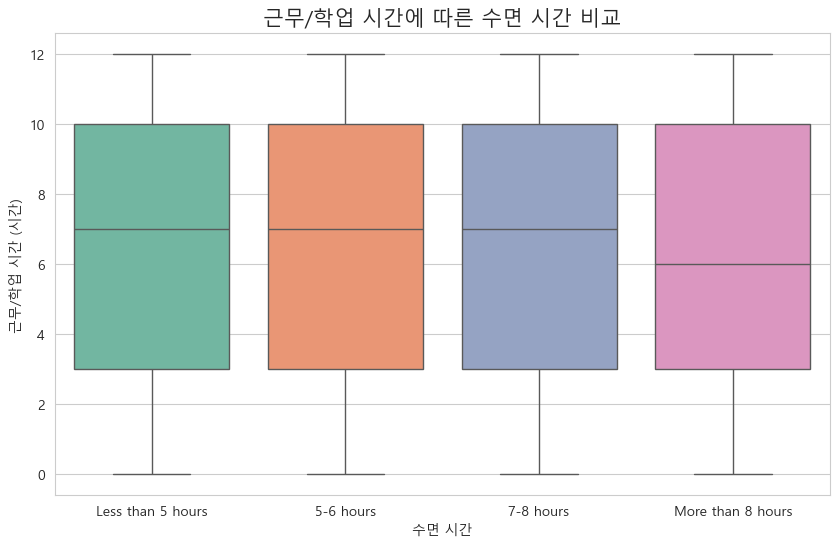

📊 [수면 시간별 평균 근무/학업 시간]


Sleep Duration
Less than 5 hours    6.278775
5-6 hours            6.245349
7-8 hours            6.358976
More than 8 hours    6.108690
Name: Work/Study Hours, dtype: float64

In [ ]:
# 근무/학업 시간(Work/Study Hours)과 수면 시간(Sleep Duration) 비교 시각화

# 수면 시간 순서 정렬
sleep_order = ['Less than 5 hours', '5-6 hours', '7-8 hours', 'More than 8 hours']

plt.figure(figsize=(10, 6))

# 박스 플롯 그리기
sns.boxplot(x='Sleep Duration', y='Work/Study Hours', data=df, order=sleep_order, palette='Set2')

plt.title('근무/학업 시간에 따른 수면 시간 비교', fontsize=15)
plt.xlabel('수면 시간')
plt.ylabel('근무/학업 시간 (시간)')
plt.show()

# 수치로 확인하기 (그룹별 평균 근무시간)
print("📊 [수면 시간별 평균 근무/학업 시간]")
avg_work_by_sleep = df.groupby('Sleep Duration')['Work/Study Hours'].mean().reindex(sleep_order)
display(avg_work_by_sleep)

In [ ]:
# 1. 수면 시간을 숫자로 변환 (상관관계 계산을 위해 대략적인 중간값 부여)
sleep_mapping = {
    'Less than 5 hours': 4.5,
    '5-6 hours': 5.5,
    '7-8 hours': 7.5,
    'More than 8 hours': 8.5
}

# 'Sleep_Numeric'이라는 새로운 컬럼 생성
df['Sleep_Numeric'] = df['Sleep Duration'].map(sleep_mapping)

# 2. 상관계수 계산 (근무시간 vs 수면시간)
correlation = df['Work/Study Hours'].corr(df['Sleep_Numeric'])

print(f"🔢 근무/학업 시간과 수면 시간의 상관계수: {correlation:.4f}")


🔢 근무/학업 시간과 수면 시간의 상관계수: -0.0085


전체 도시 수: 31
분석 대상 도시 수 (데이터 10개 초과): 31


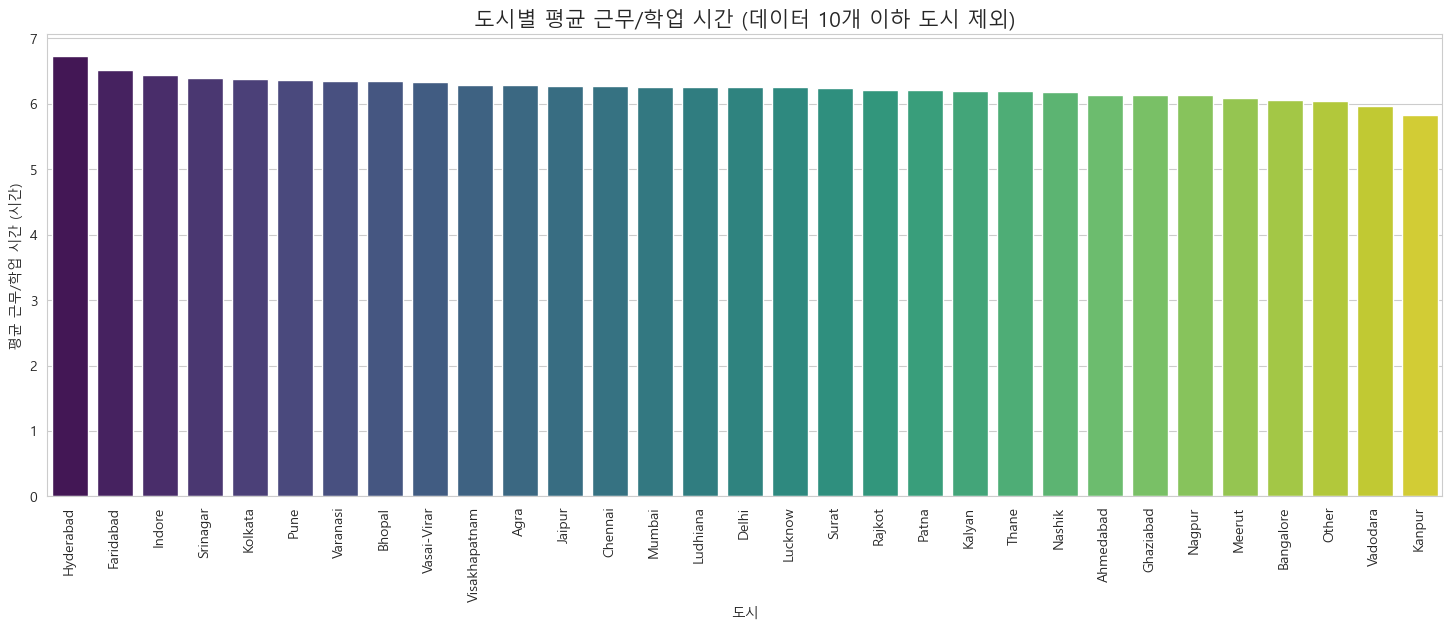

📊 [평균 근무시간이 가장 긴 도시 Top 5]


City
Hyderabad    6.724867
Faridabad    6.511934
Indore       6.443966
Srinagar     6.391998
Kolkata      6.378801
Name: Work/Study Hours, dtype: float64


📊 [평균 근무시간이 가장 짧은 도시 Top 5]


City
Kanpur       5.823784
Vadodara     5.971979
Other        6.040816
Bangalore    6.058453
Meerut       6.095514
Name: Work/Study Hours, dtype: float64

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 도시별 데이터 개수 확인 및 10개 이하인 도시 제거
city_counts = df['City'].value_counts()
valid_cities = city_counts[city_counts > 10].index  # 데이터가 10개 초과인 도시만 선택
df_filtered_city = df[df['City'].isin(valid_cities)]

print(f"전체 도시 수: {len(city_counts)}")
print(f"분석 대상 도시 수 (데이터 10개 초과): {len(valid_cities)}")

# 2. 시각화 (평균 근무시간 순으로 정렬)
plt.figure(figsize=(18, 6))

# 도시별 평균 근무시간 계산 및 정렬
order = df_filtered_city.groupby('City')['Work/Study Hours'].mean().sort_values(ascending=False).index

# 막대 그래프 그리기
sns.barplot(x='City', y='Work/Study Hours', data=df_filtered_city, order=order, palette='viridis', errorbar=None)

plt.title('도시별 평균 근무/학업 시간 (데이터 10개 이하 도시 제외)', fontsize=15)
plt.xlabel('도시')
plt.ylabel('평균 근무/학업 시간 (시간)')
plt.xticks(rotation=90)  # 도시 이름이 겹치지 않게 90도 회전
plt.show()

# 3. 상위/하위 5개 도시 수치로 확인
print("📊 [평균 근무시간이 가장 긴 도시 Top 5]")
display(df_filtered_city.groupby('City')['Work/Study Hours'].mean().sort_values(ascending=False).head(5))

print("\n📊 [평균 근무시간이 가장 짧은 도시 Top 5]")
display(df_filtered_city.groupby('City')['Work/Study Hours'].mean().sort_values(ascending=True).head(5))

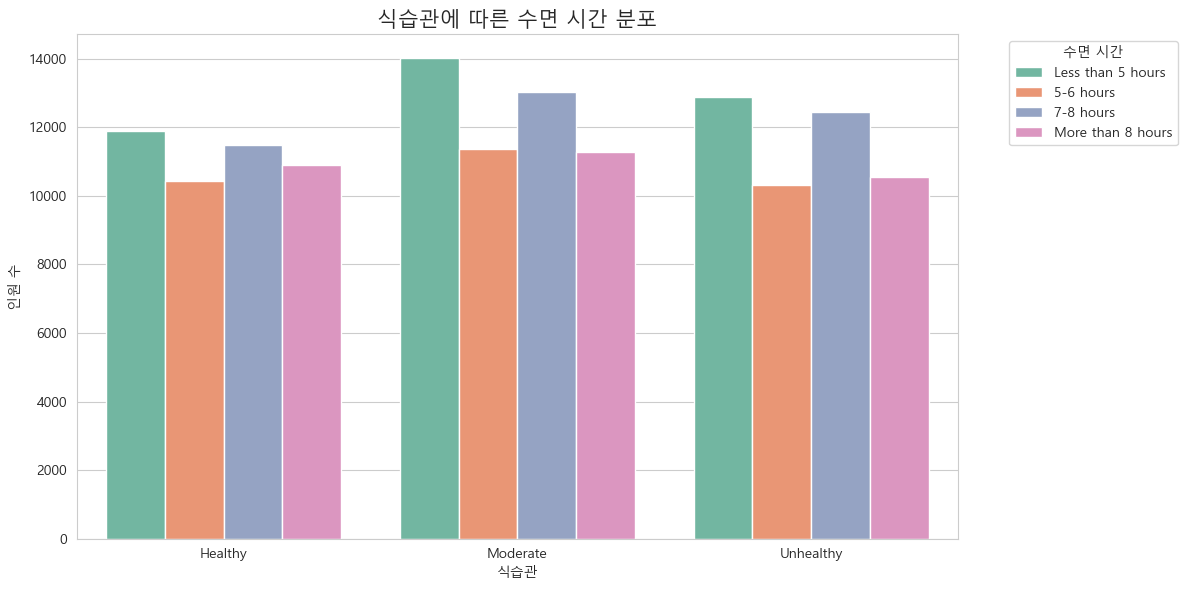

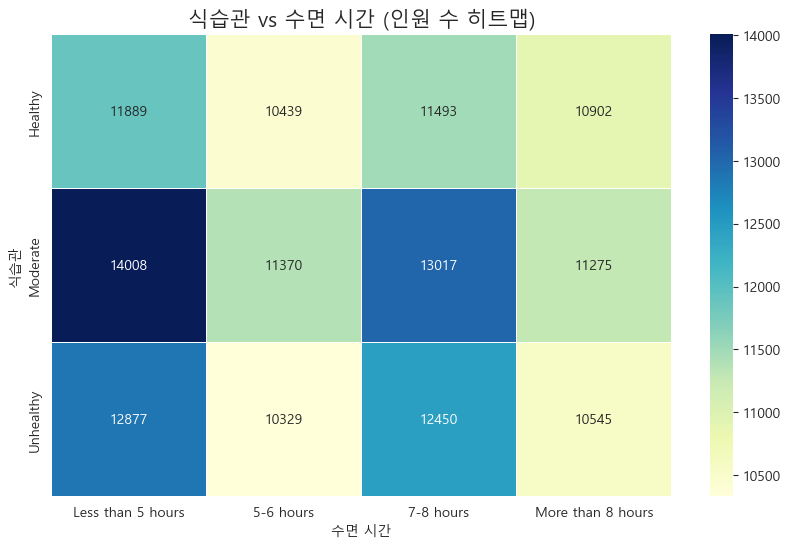

📊 [식습관과 수면 시간 교차표]


Sleep Duration,Less than 5 hours,5-6 hours,7-8 hours,More than 8 hours
Dietary Habits,,,,
Healthy,11889,10439,11493,10902
Moderate,14008,11370,13017,11275
Unhealthy,12877,10329,12450,10545


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 순서 정렬 (그래프 가독성을 위해)
sleep_order = ['Less than 5 hours', '5-6 hours', '7-8 hours', 'More than 8 hours']
diet_order = ['Healthy', 'Moderate', 'Unhealthy']

# 1. 막대 그래프 시각화 (식습관별 수면 시간 분포)
plt.figure(figsize=(12, 6))
sns.countplot(x='Dietary Habits', hue='Sleep Duration', data=df,
              order=diet_order, hue_order=sleep_order, palette='Set2')

plt.title('식습관에 따른 수면 시간 분포', fontsize=15)
plt.xlabel('식습관')
plt.ylabel('인원 수')
plt.legend(title='수면 시간', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 2. 교차표(Cross Tabulation) 및 히트맵 시각화
# 두 변수 간의 빈도수를 표로 만듭니다.
crosstab = pd.crosstab(df['Dietary Habits'], df['Sleep Duration'])
# 보기 좋게 순서 재배치
crosstab = crosstab.reindex(index=diet_order, columns=sleep_order)

plt.figure(figsize=(10, 6))
sns.heatmap(crosstab, annot=True, fmt='d', cmap='YlGnBu', linewidths=.5)
plt.title('식습관 vs 수면 시간 (인원 수 히트맵)', fontsize=15)
plt.xlabel('수면 시간')
plt.ylabel('식습관')
plt.show()

# 3. 수치 데이터 출력
print("📊 [식습관과 수면 시간 교차표]")
display(crosstab)

📊 [연령대별 우울증 발생 비율]


Age_Group
35세 이하    0.479782
35세 초과    0.017249
Name: Depression, dtype: float64

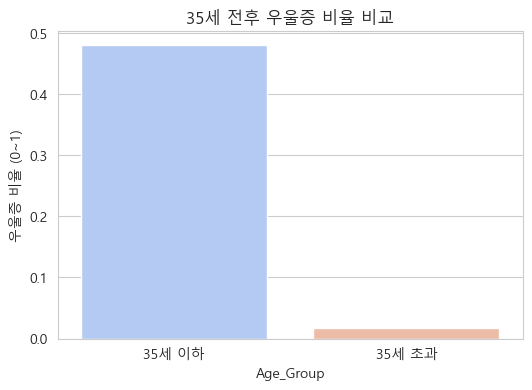


📊 [35세 전후 주요 요인 평균 비교]


,Financial Stress,Work Pressure,Job Satisfaction,Work/Study Hours
Age_Group,,,,
35세 이하,3.143565,3.287455,2.841072,6.920346
35세 초과,2.903695,2.928489,3.007007,5.884285


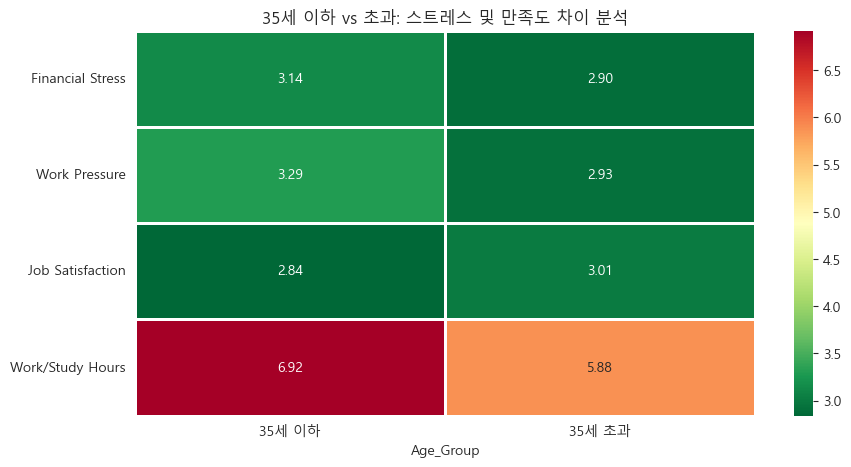

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 나이 그룹 생성 (35세 이하 vs 35세 초과)
df['Age_Group'] = df['Age'].apply(lambda x: '35세 이하' if x <= 35 else '35세 초과')

# 2. 그룹별 우울증 비율 확인 (가설 검증)
depression_rate = df.groupby('Age_Group')['Depression'].mean()

print("📊 [연령대별 우울증 발생 비율]")
display(depression_rate)

# 시각화: 우울증 비율 비교
plt.figure(figsize=(6, 4))
sns.barplot(x=depression_rate.index, y=depression_rate.values, palette='coolwarm')
plt.title('35세 전후 우울증 비율 비교')
plt.ylabel('우울증 비율 (0~1)')
plt.show()

# -------------------------------------------------------
# 3. "왜 35세 이후는 우울증이 적을까?" 원인 분석
# 주요 스트레스 요인 및 만족도 비교
# -------------------------------------------------------

# 비교할 컬럼들 (수치형 데이터)
cols_to_compare = ['Financial Stress', 'Work Pressure', 'Job Satisfaction', 'Work/Study Hours']

# 그룹별 평균 계산
comparison = df.groupby('Age_Group')[cols_to_compare].mean()

print("\n📊 [35세 전후 주요 요인 평균 비교]")
display(comparison)

# 시각화: 요인별 차이 (히트맵)
plt.figure(figsize=(10, 5))
# 보기 좋게 전치(T)하여 시각화, 수치가 높을수록 진한 색
sns.heatmap(comparison.T, annot=True, cmap='RdYlGn_r', fmt='.2f', linewidths=1)
plt.title('35세 이하 vs 초과: 스트레스 및 만족도 차이 분석')
plt.show()

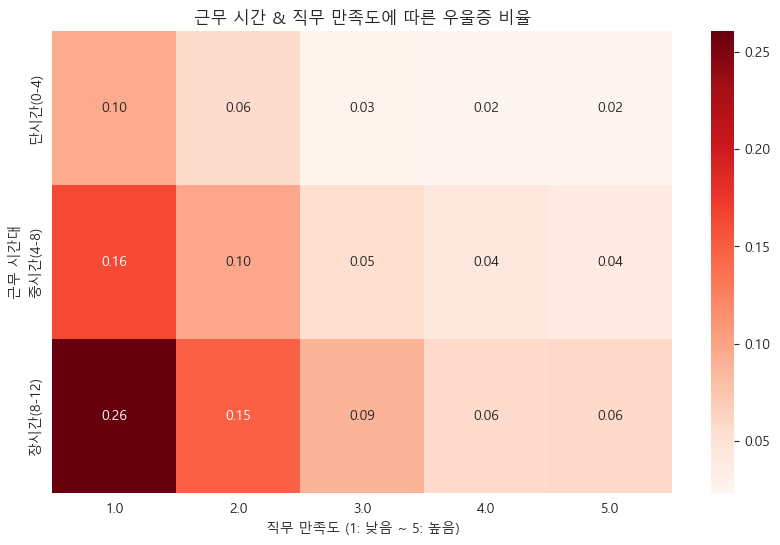

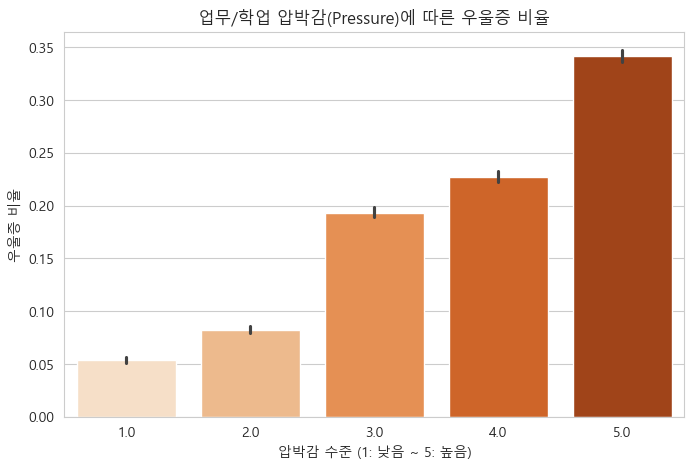

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 근무 시간과 직무 만족도에 따른 우울증 비율 (히트맵)
# 근무 시간을 구간별로 나누기 (예: 2시간 단위)
df['Work_Hours_Bin'] = pd.cut(df['Work/Study Hours'], bins=[0, 4, 8, 12], labels=['단시간(0-4)', '중시간(4-8)', '장시간(8-12)'])

# 피벗 테이블 생성: 근무 시간(행) x 직무 만족도(열) => 값: 우울증 비율
pivot_table = df.pivot_table(index='Work_Hours_Bin', columns='Job Satisfaction', values='Depression', aggfunc='mean')

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt='.2f', cmap='Reds')
plt.title('근무 시간 & 직무 만족도에 따른 우울증 비율')
plt.xlabel('직무 만족도 (1: 낮음 ~ 5: 높음)')
plt.ylabel('근무 시간대')
plt.show()

# 2. 업무/학업 압박감(Pressure)과 우울증의 관계 (막대 그래프)
# Work Pressure가 결측치인 경우 Academic Pressure로 대체하여 통합 'Pressure' 컬럼 생성
df['Total_Pressure'] = df['Work Pressure'].fillna(df['Academic Pressure'])

plt.figure(figsize=(8, 5))
sns.barplot(x='Total_Pressure', y='Depression', data=df, palette='Oranges')
plt.title('업무/학업 압박감(Pressure)에 따른 우울증 비율')
plt.xlabel('압박감 수준 (1: 낮음 ~ 5: 높음)')
plt.ylabel('우울증 비율')
plt.show()

📊 [35세 전후 평균 압박감 점수]


Age_Group
35세 이하    3.206726
35세 초과    2.928496
Name: Total_Pressure, dtype: float64

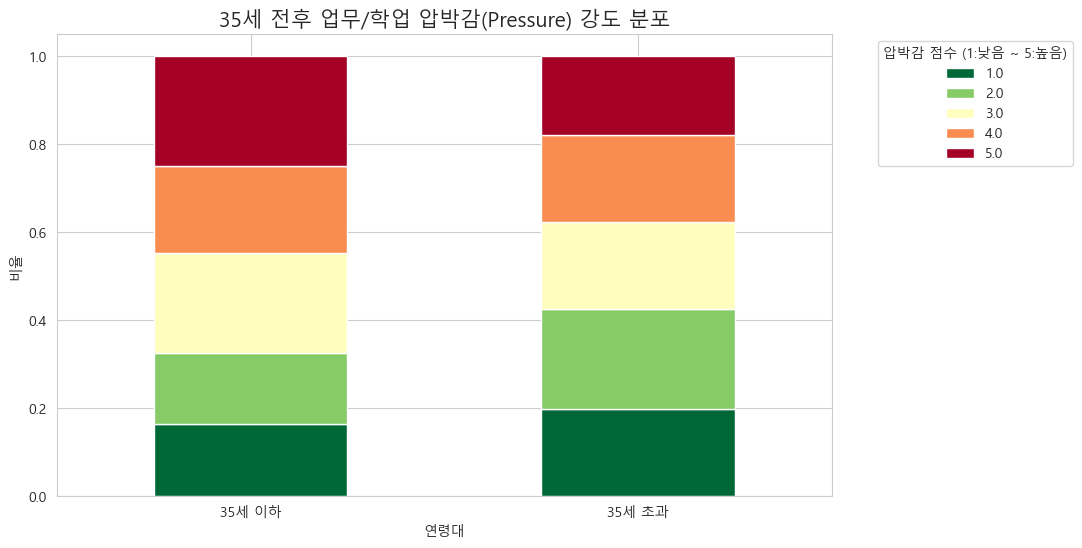

📊 [압박감 점수별 상세 비율]


Total_Pressure,1.000000,2.000000,3.000000,4.000000,5.000000
Age_Group,,,,,
35세 이하,16.5%,16.0%,22.8%,19.7%,25.0%
35세 초과,20.0%,22.7%,19.8%,19.7%,17.9%


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 필요한 컬럼 생성 (이전 단계에서 안 만들었을 경우를 대비해 다시 작성)
df['Age_Group'] = df['Age'].apply(lambda x: '35세 이하' if x <= 35 else '35세 초과')
df['Total_Pressure'] = df['Work Pressure'].fillna(df['Academic Pressure'])

# 2. 평균 압박감 점수 비교
avg_pressure = df.groupby('Age_Group')['Total_Pressure'].mean()
print("📊 [35세 전후 평균 압박감 점수]")
display(avg_pressure)

# 3. 압박감 점수 분포 시각화 (비율 비교)
# 각 나이 그룹 내에서 1~5점의 비중이 어떻게 되는지 100% 기준 누적 막대 그래프로 그립니다.
pressure_dist = pd.crosstab(df['Age_Group'], df['Total_Pressure'], normalize='index')

# 시각화
pressure_dist.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='RdYlGn_r')
plt.title('35세 전후 업무/학업 압박감(Pressure) 강도 분포', fontsize=15)
plt.xlabel('연령대')
plt.ylabel('비율')
plt.legend(title='압박감 점수 (1:낮음 ~ 5:높음)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.show()

# 4. 수치로 상세 확인
print("📊 [압박감 점수별 상세 비율]")
display(pressure_dist.style.format("{:.1%}"))

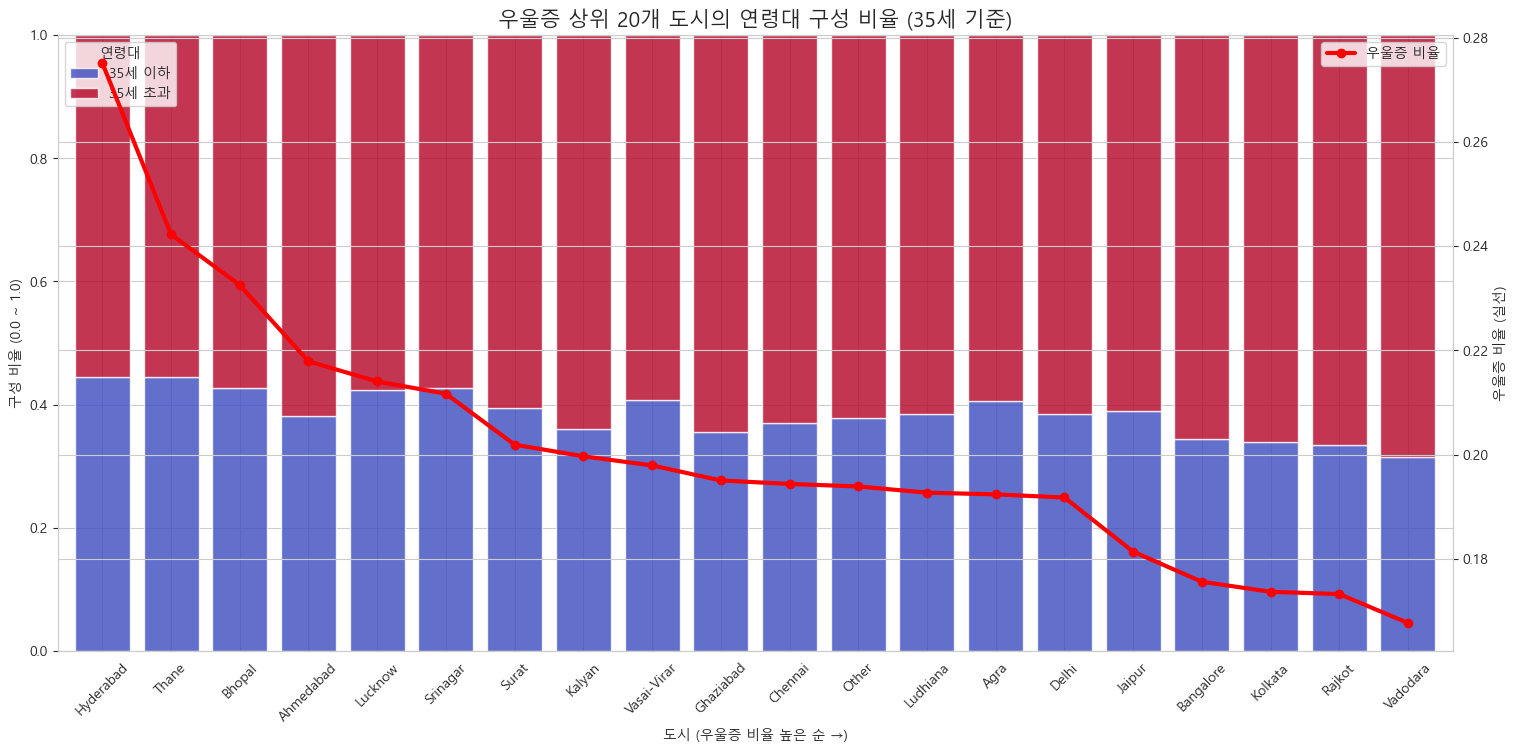

📊 [우울증 상위 도시의 연령대 구성 비율]


Age_Group,35세 이하,35세 초과,Depression_Rate
City,,,
Hyderabad,44.4%,55.6%,27.5%
Thane,44.6%,55.4%,24.2%
Bhopal,42.6%,57.4%,23.3%
Ahmedabad,38.1%,61.9%,21.8%
Lucknow,42.3%,57.7%,21.4%
Srinagar,42.7%,57.3%,21.2%
Surat,39.5%,60.5%,20.2%
Kalyan,36.1%,63.9%,20.0%
Vasai-Virar,40.8%,59.2%,19.8%


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 데이터 전처리 (10개 이하 도시 제거)
city_counts = df['City'].value_counts()
valid_cities = city_counts[city_counts > 10].index
df_valid = df[df['City'].isin(valid_cities)].copy()

# 나이 그룹 생성
df_valid['Age_Group'] = df_valid['Age'].apply(lambda x: '35세 이하' if x <= 35 else '35세 초과')

# 2. 도시별 우울증 비율 계산 (정렬 기준용)
city_depression_rate = df_valid.groupby('City')['Depression'].mean()

# 3. 도시별 연령대 '비율' 계산 (normalize='index'로 행별 합계가 1이 되도록 설정)
city_age_ratio = pd.crosstab(df_valid['City'], df_valid['Age_Group'], normalize='index')

# 4. 정렬: 우울증 비율이 높은 순서대로 도시 정렬
# 우울증 비율 컬럼을 잠시 합쳐서 정렬 기준으로 사용
city_age_ratio['Depression_Rate'] = city_depression_rate
city_age_ratio_sorted = city_age_ratio.sort_values(by='Depression_Rate', ascending=False)

# 5. 시각화 (상위 20개 도시)
# 그래프용 데이터에서 우울증 비율 컬럼은 분리 (막대 그래프에는 연령 비율만 쓰기 위해)
plot_data = city_age_ratio_sorted.head(20).drop(columns='Depression_Rate')
depression_line = city_age_ratio_sorted['Depression_Rate'].head(20)

fig, ax1 = plt.subplots(figsize=(18, 8))

# 100% 누적 막대 그래프 (연령대 비율)
plot_data.plot(kind='bar', stacked=True, ax=ax1, width=0.8, colormap='coolwarm', alpha=0.8)

# 그래프 꾸미기
ax1.set_title('우울증 상위 20개 도시의 연령대 구성 비율 (35세 기준)', fontsize=15)
ax1.set_xlabel('도시 (우울증 비율 높은 순 →)')
ax1.set_ylabel('구성 비율 (0.0 ~ 1.0)')
ax1.set_ylim(0, 1)
ax1.legend(title='연령대', loc='upper left')
ax1.tick_params(axis='x', rotation=45)

# 보조축: 우울증 비율 꺾은선 그래프
ax2 = ax1.twinx()
ax2.plot(range(20), depression_line, color='red', marker='o', linestyle='-', linewidth=3, label='우울증 비율')
ax2.set_ylabel('우울증 비율 (실선)')
ax2.legend(loc='upper right')

plt.show()

# 6. 수치 데이터 확인
print("📊 [우울증 상위 도시의 연령대 구성 비율]")
display(city_age_ratio_sorted.head(10).style.format("{:.1%}"))

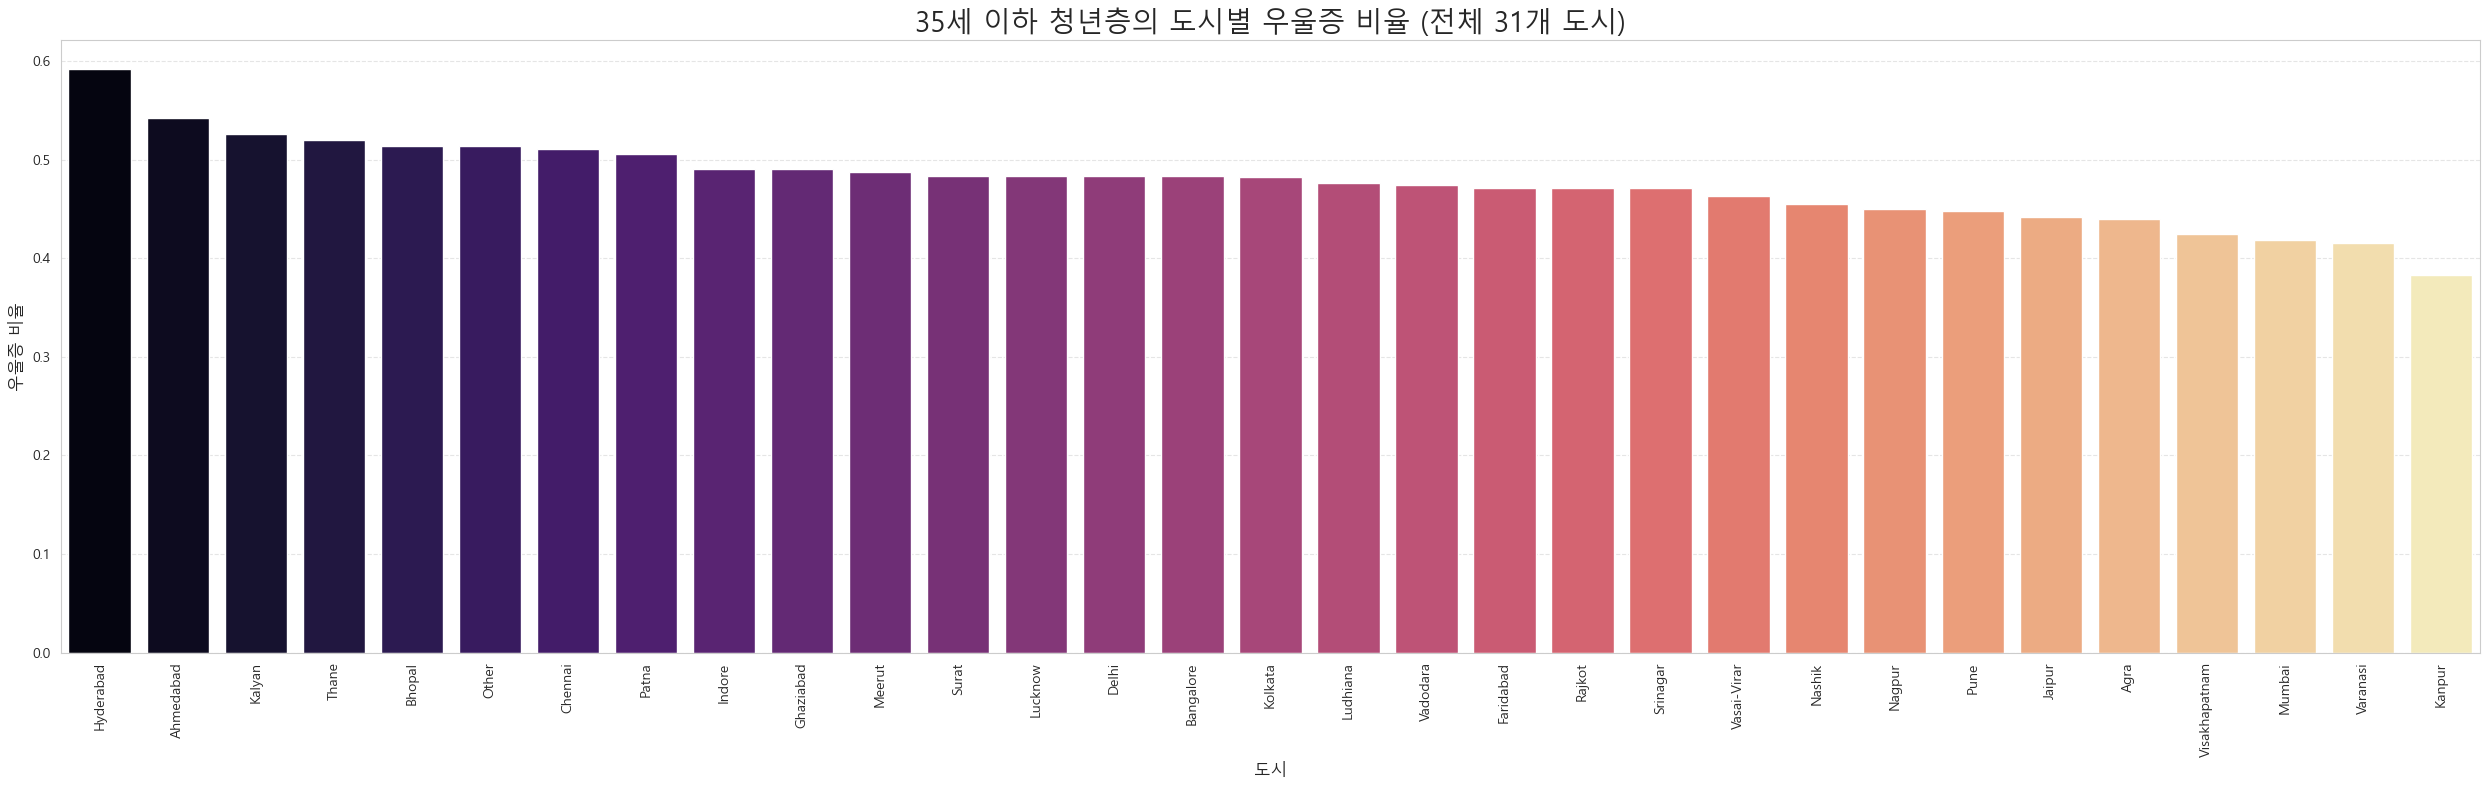


📊 [전체 도시 상세 데이터 테이블] (총 31개)


,우울증 비율,응답자 수
City,,
Hyderabad,59.16%,1998
Ahmedabad,54.26%,2138
Kalyan,52.57%,2378
Thane,52.01%,1911
Bhopal,51.42%,1482
Other,51.35%,37
Chennai,51.10%,1495
Patna,50.56%,1780
Indore,49.06%,1492


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. 데이터 전처리 (35세 이하 & 데이터 10개 초과 도시)
df_young = df[df['Age'] <= 35].copy()
city_counts = df_young['City'].value_counts()
valid_cities = city_counts[city_counts > 10].index
df_young_valid = df_young[df_young['City'].isin(valid_cities)]

# 2. 도시별 우울증 비율 및 데이터 개수 계산
city_stats = df_young_valid.groupby('City')['Depression'].agg(['mean', 'count'])
city_stats = city_stats.sort_values(by='mean', ascending=False)
city_stats.columns = ['우울증 비율', '응답자 수'] # 컬럼명 변경

# 3. 전체 도시 시각화
plt.figure(figsize=(25, 8))
sns.barplot(x=city_stats.index, y=city_stats['우울증 비율'], palette='magma')

plt.title(f'35세 이하 청년층의 도시별 우울증 비율 (전체 {len(city_stats)}개 도시)', fontsize=20)
plt.xlabel('도시', fontsize=12)
plt.ylabel('우울증 비율', fontsize=12)
plt.xticks(rotation=90, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# 4. 상세 테이블 출력 (그래프 아래)
print(f"\n📊 [전체 도시 상세 데이터 테이블] (총 {len(city_stats)}개)")
# 스타일을 적용하여 비율은 %로, 막대 그래프를 표 안에 함께 표시
display(city_stats.style.format({'우울증 비율': '{:.2%}'})
                   .background_gradient(subset=['우울증 비율'], cmap='Reds'))

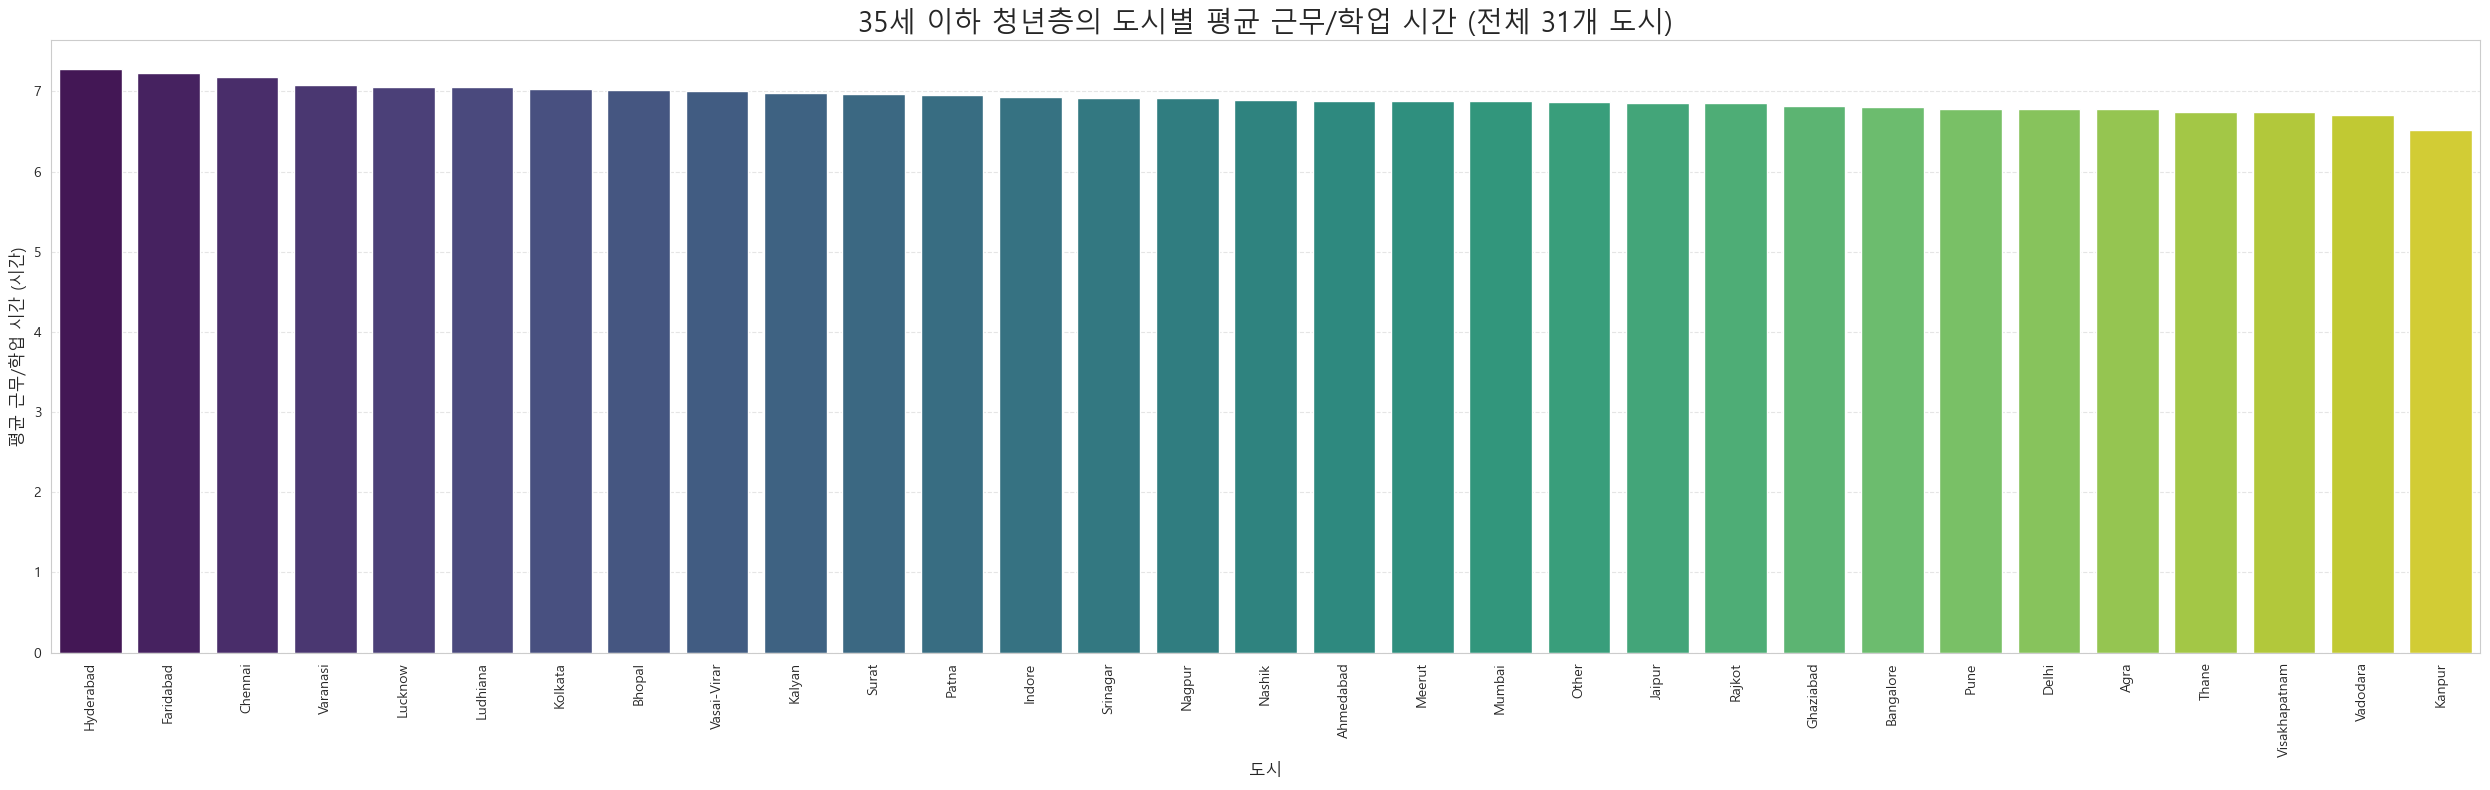


📊 [도시별 평균 근무/학업 시간 상세 표] (상위 20개)


,평균 근무시간
City,
Hyderabad,7.272773
Faridabad,7.225263
Chennai,7.185284
Varanasi,7.083866
Lucknow,7.054114
Ludhiana,7.051244
Kolkata,7.027950
Bhopal,7.020243
Vasai-Virar,7.008511


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 데이터 전처리 (35세 이하 & 데이터 10개 초과 도시)
df_young = df[df['Age'] <= 35].copy()
city_counts = df_young['City'].value_counts()
valid_cities = city_counts[city_counts > 10].index
df_young_valid = df_young[df_young['City'].isin(valid_cities)]

# 2. 도시별 평균 근무/학업 시간 계산 및 정렬
city_work_hours = df_young_valid.groupby('City')['Work/Study Hours'].mean().sort_values(ascending=False)

# 3. 시각화
plt.figure(figsize=(25, 8))
sns.barplot(x=city_work_hours.index, y=city_work_hours.values, palette='viridis')

plt.title(f'35세 이하 청년층의 도시별 평균 근무/학업 시간 (전체 {len(city_work_hours)}개 도시)', fontsize=20)
plt.xlabel('도시', fontsize=12)
plt.ylabel('평균 근무/학업 시간 (시간)', fontsize=12)
plt.xticks(rotation=90, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# 4. 상세 테이블 출력
print(f"\n📊 [도시별 평균 근무/학업 시간 상세 표] (상위 20개)")
# 보기 좋게 데이터프레임으로 변환 후 스타일 적용
display(city_work_hours.to_frame(name='평균 근무시간').head(20).style.background_gradient(cmap='Greens'))

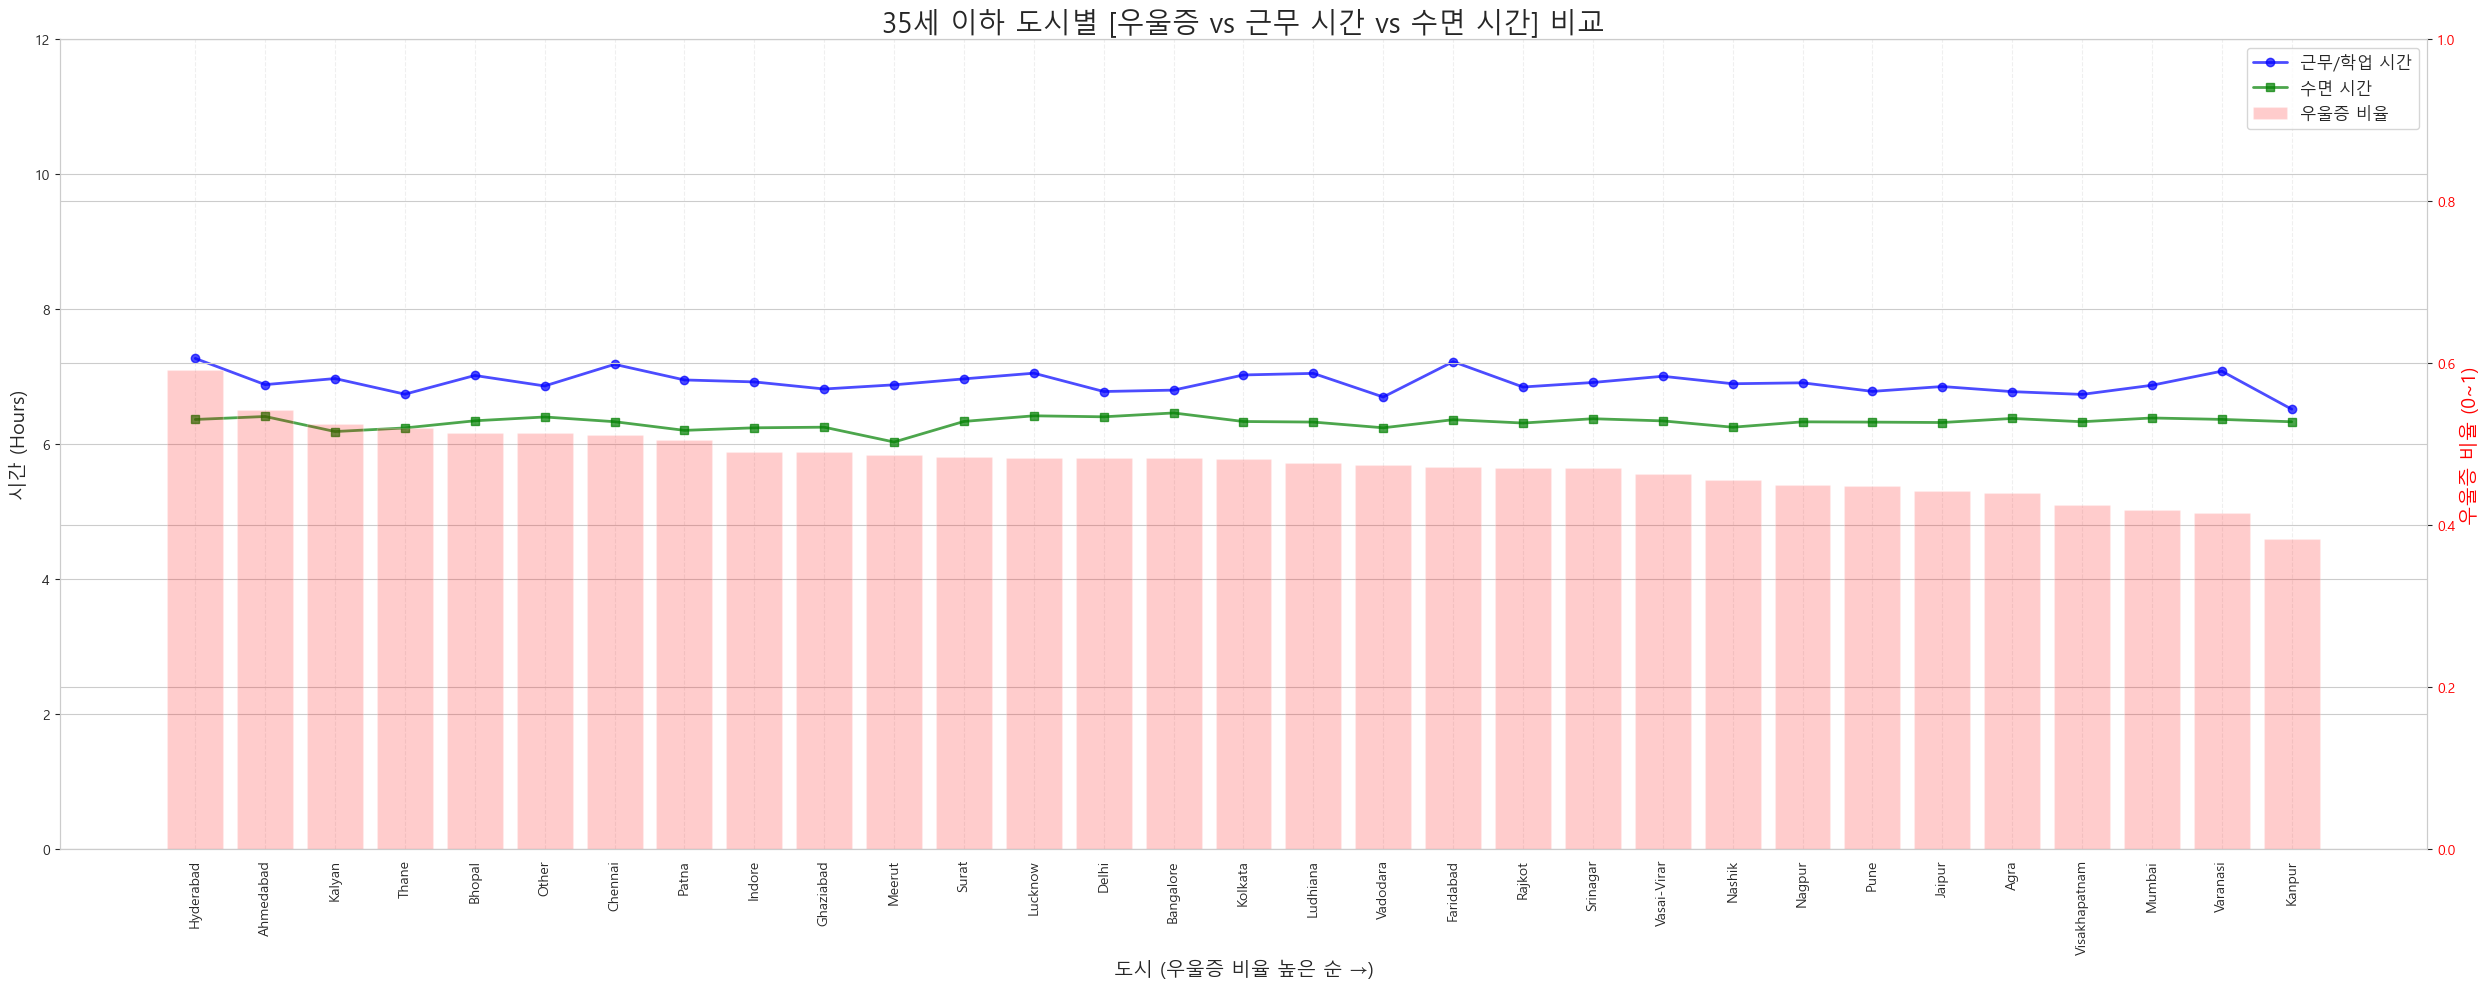


📊 [도시별 3대 지표 상세 수치 (우울증 순)]


,Depression,Work/Study Hours,Sleep_Numeric
City,,,
Hyderabad,0.59,7.27,6.37
Ahmedabad,0.54,6.88,6.41
Kalyan,0.53,6.97,6.19
Thane,0.52,6.74,6.24
Bhopal,0.51,7.02,6.35
Other,0.51,6.86,6.41
Chennai,0.51,7.19,6.34
Patna,0.51,6.95,6.21
Indore,0.49,6.92,6.24


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. 데이터 전처리 (35세 이하 & 데이터 10개 초과 도시)
df_young = df[df['Age'] <= 35].copy()
city_counts = df_young['City'].value_counts()
valid_cities = city_counts[city_counts > 10].index
df_young_valid = df_young[df_young['City'].isin(valid_cities)].copy()

# 2. 수면 시간 수치화 (평균 계산을 위해)
sleep_mapping = {
    'Less than 5 hours': 4.0,
    '5-6 hours': 5.5,
    '7-8 hours': 7.5,
    'More than 8 hours': 9.0
}
df_young_valid['Sleep_Numeric'] = df_young_valid['Sleep Duration'].map(sleep_mapping)

# 3. 도시별 평균 계산 (우울증, 근무시간, 수면시간)
city_stats = df_young_valid.groupby('City')[['Depression', 'Work/Study Hours', 'Sleep_Numeric']].mean()

# 4. 정렬 (우울증 비율 높은 순)
city_stats = city_stats.sort_values(by='Depression', ascending=False)

# 5. 시각화 (이중축 그래프)
fig, ax1 = plt.subplots(figsize=(25, 10))

# [왼쪽 축] 근무 시간 & 수면 시간 (꺾은선 그래프)
ax1.plot(city_stats.index, city_stats['Work/Study Hours'], color='blue', marker='o', label='근무/학업 시간', linewidth=2, alpha=0.7)
ax1.plot(city_stats.index, city_stats['Sleep_Numeric'], color='green', marker='s', label='수면 시간', linewidth=2, alpha=0.7)
ax1.set_ylabel('시간 (Hours)', fontsize=14)
ax1.set_ylim(0, 12) # 시간 축 범위 고정
ax1.tick_params(axis='y')

# [오른쪽 축] 우울증 비율 (막대 그래프 - 배경)
ax2 = ax1.twinx()
ax2.bar(city_stats.index, city_stats['Depression'], color='red', alpha=0.2, label='우울증 비율')
ax2.set_ylabel('우울증 비율 (0~1)', fontsize=14, color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.set_ylim(0, 1) # 비율 축 범위 고정

# 그래프 꾸미기
plt.title('35세 이하 도시별 [우울증 vs 근무 시간 vs 수면 시간] 비교', fontsize=20)
ax1.set_xlabel('도시 (우울증 비율 높은 순 →)', fontsize=14)
ax1.set_xticklabels(city_stats.index, rotation=90, fontsize=10)
ax1.grid(axis='x', linestyle='--', alpha=0.3)

# 범례 합치기 (왼쪽 축 + 오른쪽 축)
lines, labels = ax1.get_legend_handles_labels()
bars, bar_labels = ax2.get_legend_handles_labels()
ax1.legend(lines + bars, labels + bar_labels, loc='upper right', fontsize=12)

plt.tight_layout()
plt.show()

# 6. 상세 데이터 히트맵 (수치 확인용)
print("\n📊 [도시별 3대 지표 상세 수치 (우울증 순)]")
# 보기 좋게 색상 입혀서 출력
display(city_stats.style.background_gradient(cmap='RdYlGn_r', subset=['Depression', 'Work/Study Hours'])
                      .background_gradient(cmap='RdYlGn', subset=['Sleep_Numeric'])
                      .format("{:.2f}"))

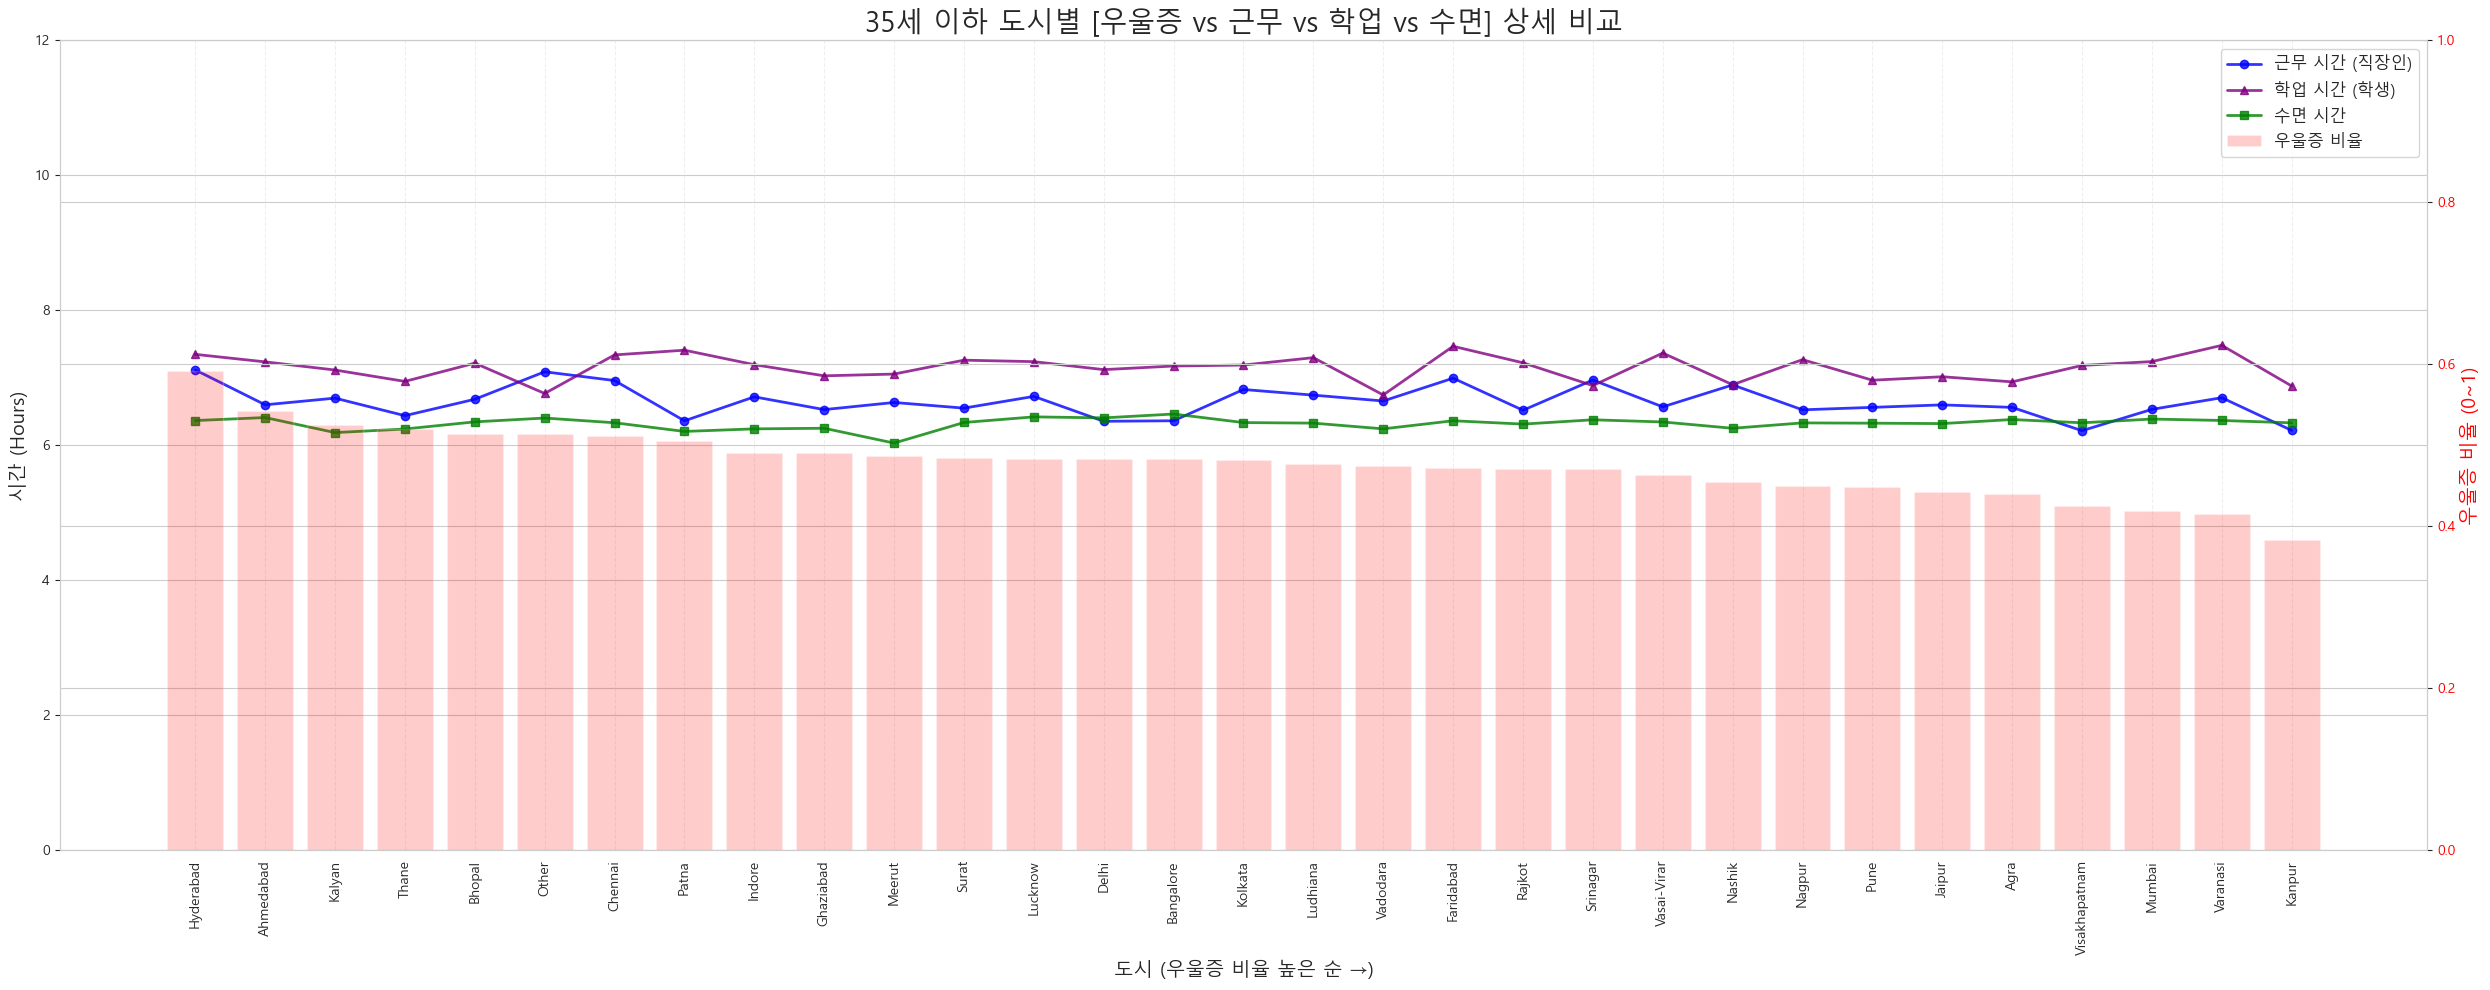


📊 [도시별 4대 지표 상세 수치 (우울증 순)]


,Depression,Work_Hours_Only,Study_Hours_Only,Sleep_Numeric
City,,,,
Hyderabad,0.59,7.12,7.35,6.37
Ahmedabad,0.54,6.60,7.24,6.41
Kalyan,0.53,6.70,7.12,6.19
Thane,0.52,6.44,6.95,6.24
Bhopal,0.51,6.68,7.22,6.35
Other,0.51,7.09,6.77,6.41
Chennai,0.51,6.96,7.34,6.34
Patna,0.51,6.36,7.41,6.21
Indore,0.49,6.72,7.20,6.24


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. 데이터 전처리 (35세 이하 & 데이터 10개 초과 도시)
df_young = df[df['Age'] <= 35].copy()
city_counts = df_young['City'].value_counts()
valid_cities = city_counts[city_counts > 10].index
df_young_valid = df_young[df_young['City'].isin(valid_cities)].copy()

# 2. 근무 시간과 학업 시간 분리
# 직장인(Working Professional)인 경우의 시간 -> 근무 시간
# 학생(Student)인 경우의 시간 -> 학업 시간
df_young_valid['Work_Hours_Only'] = df_young_valid.loc[df_young_valid['Working Professional or Student'] == 'Working Professional', 'Work/Study Hours']
df_young_valid['Study_Hours_Only'] = df_young_valid.loc[df_young_valid['Working Professional or Student'] == 'Student', 'Work/Study Hours']

# 3. 수면 시간 수치화
sleep_mapping = {
    'Less than 5 hours': 4.0,
    '5-6 hours': 5.5,
    '7-8 hours': 7.5,
    'More than 8 hours': 9.0
}
df_young_valid['Sleep_Numeric'] = df_young_valid['Sleep Duration'].map(sleep_mapping)

# 4. 도시별 평균 계산
city_stats = df_young_valid.groupby('City')[['Depression', 'Work_Hours_Only', 'Study_Hours_Only', 'Sleep_Numeric']].mean()

# 5. 정렬 (우울증 비율 높은 순)
city_stats = city_stats.sort_values(by='Depression', ascending=False)

# 6. 시각화 (이중축 그래프)
fig, ax1 = plt.subplots(figsize=(25, 10))

# [왼쪽 축] 시간 지표들 (꺾은선 그래프)
# 근무 시간 (파랑)
ax1.plot(city_stats.index, city_stats['Work_Hours_Only'], color='blue', marker='o', label='근무 시간 (직장인)', linewidth=2, alpha=0.8)
# 학업 시간 (보라)
ax1.plot(city_stats.index, city_stats['Study_Hours_Only'], color='purple', marker='^', label='학업 시간 (학생)', linewidth=2, alpha=0.8)
# 수면 시간 (초록)
ax1.plot(city_stats.index, city_stats['Sleep_Numeric'], color='green', marker='s', label='수면 시간', linewidth=2, alpha=0.8)

ax1.set_ylabel('시간 (Hours)', fontsize=14)
ax1.set_ylim(0, 12)
ax1.tick_params(axis='y')

# [오른쪽 축] 우울증 비율 (막대 그래프)
ax2 = ax1.twinx()
ax2.bar(city_stats.index, city_stats['Depression'], color='red', alpha=0.2, label='우울증 비율')
ax2.set_ylabel('우울증 비율 (0~1)', fontsize=14, color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.set_ylim(0, 1)

# 그래프 꾸미기
plt.title('35세 이하 도시별 [우울증 vs 근무 vs 학업 vs 수면] 상세 비교', fontsize=20)
ax1.set_xlabel('도시 (우울증 비율 높은 순 →)', fontsize=14)
ax1.set_xticklabels(city_stats.index, rotation=90, fontsize=10)
ax1.grid(axis='x', linestyle='--', alpha=0.3)

# 범례 합치기
lines, labels = ax1.get_legend_handles_labels()
bars, bar_labels = ax2.get_legend_handles_labels()
ax1.legend(lines + bars, labels + bar_labels, loc='upper right', fontsize=12)

plt.tight_layout()
plt.show()

# 7. 상세 데이터 히트맵
print("\n📊 [도시별 4대 지표 상세 수치 (우울증 순)]")
display(city_stats.style.background_gradient(cmap='RdYlGn_r', subset=['Depression', 'Work_Hours_Only', 'Study_Hours_Only'])
                      .background_gradient(cmap='RdYlGn', subset=['Sleep_Numeric'])
                      .format("{:.2f}"))

In [ ]:
import pandas as pd

# 1. 데이터 전처리 (35세 이하 & 데이터 10개 초과 도시)
df_young = df[df['Age'] <= 35].copy()
city_counts = df_young['City'].value_counts()
valid_cities = city_counts[city_counts > 10].index
df_young_valid = df_young[df_young['City'].isin(valid_cities)].copy()

# 2. 근무/학업 시간 및 압박감 분리
df_young_valid['Work_Hours_Only'] = df_young_valid.loc[df_young_valid['Working Professional or Student'] == 'Working Professional', 'Work/Study Hours']
df_young_valid['Work_Pressure_Only'] = df_young_valid.loc[df_young_valid['Working Professional or Student'] == 'Working Professional', 'Work Pressure']

df_young_valid['Study_Hours_Only'] = df_young_valid.loc[df_young_valid['Working Professional or Student'] == 'Student', 'Work/Study Hours']
df_young_valid['Academic_Pressure_Only'] = df_young_valid.loc[df_young_valid['Working Professional or Student'] == 'Student', 'Academic Pressure']

# 3. 도시별 평균 계산
cols_to_mean = ['Depression', 'Work_Hours_Only', 'Work_Pressure_Only', 'Study_Hours_Only', 'Academic_Pressure_Only']
city_stats = df_young_valid.groupby('City')[cols_to_mean].mean()

# 4. 정렬 (우울증 비율 높은 순)
city_stats = city_stats.sort_values(by='Depression', ascending=False)


# 스타일 적용: RdYlGn_r (Red-Yellow-Green reversed)
# 값이 높을수록 Red, 낮을수록 Green
display(city_stats.style.background_gradient(cmap='RdYlGn_r')
                      .format("{:.2f}"))

,Depression,Work_Hours_Only,Work_Pressure_Only,Study_Hours_Only,Academic_Pressure_Only
City,,,,,
Hyderabad,0.59,7.12,3.47,7.35,3.29
Ahmedabad,0.54,6.60,3.44,7.24,3.26
Kalyan,0.53,6.70,3.28,7.12,3.09
Thane,0.52,6.44,3.43,6.95,3.01
Bhopal,0.51,6.68,3.36,7.22,3.11
Other,0.51,7.09,3.82,6.77,2.81
Chennai,0.51,6.96,3.42,7.34,3.30
Patna,0.51,6.36,3.29,7.41,3.25
Indore,0.49,6.72,3.30,7.20,3.21


In [ ]:
import pandas as pd

# 1. 데이터 전처리 (35세 이하 & 데이터 10개 초과 도시)
df_young = df[df['Age'] <= 35].copy()
city_counts = df_young['City'].value_counts()
valid_cities = city_counts[city_counts > 10].index
df_young_valid = df_young[df_young['City'].isin(valid_cities)].copy()

# 2. 직장인 vs 학생 데이터 분리 및 지표 계산
# (1) 직장인 데이터
df_worker = df_young_valid[df_young_valid['Working Professional or Student'] == 'Working Professional']
worker_stats = df_worker.groupby('City')[['Depression', 'Work/Study Hours', 'Work Pressure']].mean()
worker_stats.columns = ['Worker_Depression', 'Work_Hours', 'Work_Pressure'] # 컬럼명 변경

# (2) 학생 데이터
df_student = df_young_valid[df_young_valid['Working Professional or Student'] == 'Student']
student_stats = df_student.groupby('City')[['Depression', 'Work/Study Hours', 'Academic Pressure']].mean()
student_stats.columns = ['Student_Depression', 'Study_Hours', 'Academic_Pressure'] # 컬럼명 변경

# 3. 데이터 합치기 (도시 기준)
# 전체 우울증 비율도 정렬 기준으로 쓰기 위해 포함
total_depression = df_young_valid.groupby('City')['Depression'].mean()
city_stats_combined = pd.concat([total_depression, worker_stats, student_stats], axis=1)
city_stats_combined.rename(columns={'Depression': 'Total_Depression'}, inplace=True)

# 4. 정렬 (전체 우울증 비율 높은 순)
city_stats_combined = city_stats_combined.sort_values(by='Total_Depression', ascending=False)

# 스타일 적용
# 우울증 비율 컬럼들 (Total, Worker, Student)
# 시간 및 압박감 컬럼들
display(city_stats_combined.style.background_gradient(cmap='RdYlGn_r', subset=['Total_Depression', 'Worker_Depression', 'Student_Depression'])
                                 .background_gradient(cmap='RdYlGn_r', subset=['Work_Hours', 'Work_Pressure', 'Study_Hours', 'Academic_Pressure'])
                                 .format("{:.2f}"))

,Total_Depression,Worker_Depression,Work_Hours,Work_Pressure,Student_Depression,Study_Hours,Academic_Pressure
City,,,,,,,
Hyderabad,0.59,0.43,7.12,3.47,0.67,7.35,3.29
Ahmedabad,0.54,0.44,6.60,3.44,0.67,7.24,3.26
Kalyan,0.53,0.39,6.70,3.28,0.60,7.12,3.09
Thane,0.52,0.42,6.44,3.43,0.59,6.95,3.01
Bhopal,0.51,0.33,6.68,3.36,0.62,7.22,3.11
Other,0.51,0.36,7.09,3.82,0.58,6.77,2.81
Chennai,0.51,0.39,6.96,3.42,0.60,7.34,3.30
Patna,0.51,0.34,6.36,3.29,0.63,7.41,3.25
Indore,0.49,0.40,6.72,3.30,0.60,7.20,3.21


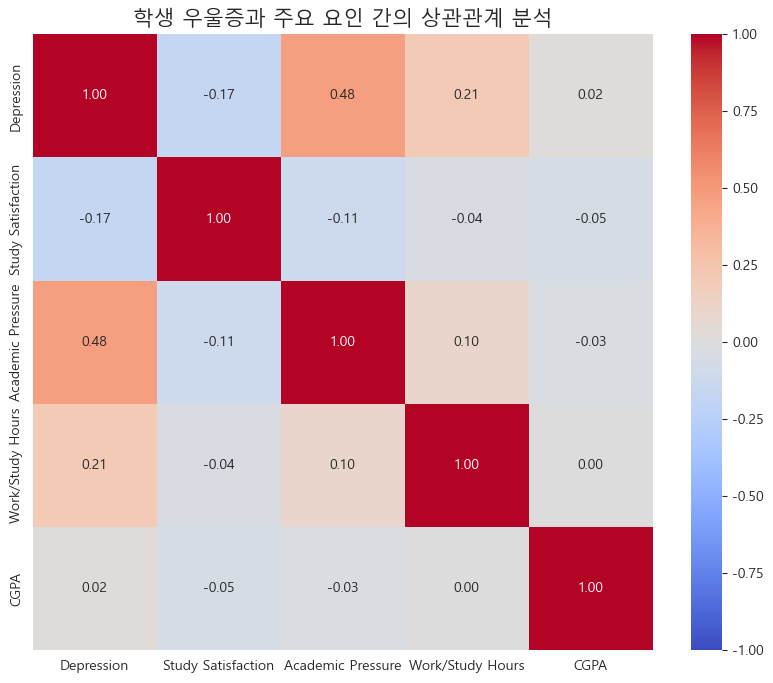

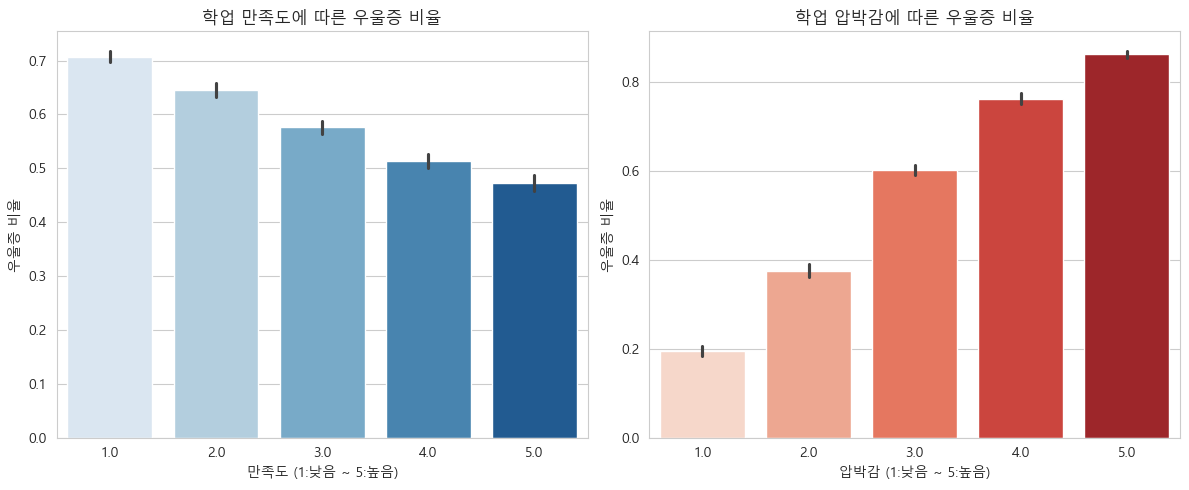

📊 [상관관계 분석 결과 요약]


,우울증과의 상관계수
Academic Pressure,0.475106
Work/Study Hours,0.208563
CGPA,0.021829
Study Satisfaction,-0.168119


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 학생 데이터만 추출
df_student = df[df['Working Professional or Student'] == 'Student'].copy()

# 2. 분석할 주요 변수 선택
# Depression, Study Satisfaction, Academic Pressure, Work/Study Hours, CGPA
cols_to_analyze = ['Depression', 'Study Satisfaction', 'Academic Pressure', 'Work/Study Hours', 'CGPA']
student_corr = df_student[cols_to_analyze].corr()

# 3. 상관관계 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(student_corr, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('학생 우울증과 주요 요인 간의 상관관계 분석', fontsize=15)
plt.show()

# 4. 주요 요인별 우울증 비율 상세 분석 (막대 그래프)
# (1) 학업 만족도에 따른 우울증
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.barplot(x='Study Satisfaction', y='Depression', data=df_student, palette='Blues')
plt.title('학업 만족도에 따른 우울증 비율')
plt.xlabel('만족도 (1:낮음 ~ 5:높음)')
plt.ylabel('우울증 비율')

# (2) 학업 압박감에 따른 우울증
plt.subplot(1, 2, 2)
sns.barplot(x='Academic Pressure', y='Depression', data=df_student, palette='Reds')
plt.title('학업 압박감에 따른 우울증 비율')
plt.xlabel('압박감 (1:낮음 ~ 5:높음)')
plt.ylabel('우울증 비율')

plt.tight_layout()
plt.show()

# 5. 텍스트로 결론 요약 출력
print("📊 [상관관계 분석 결과 요약]")
# 우울증과의 상관계수만 추출해서 정렬
dep_corr = student_corr['Depression'].drop('Depression').sort_values(ascending=False)
display(dep_corr.to_frame(name='우울증과의 상관계수'))

In [ ]:
import pandas as pd

# 1. 데이터 전처리 (35세 이하 & 데이터 10개 초과 도시 & 학생만)
df_young = df[df['Age'] <= 35].copy()
city_counts = df_young['City'].value_counts()
valid_cities = city_counts[city_counts > 10].index
df_young_student = df_young[(df_young['City'].isin(valid_cities)) & (df_young['Working Professional or Student'] == 'Student')]

# 2. 도시별 평균 계산
# Depression, Work/Study Hours(학업시간), Academic Pressure, Study Satisfaction
cols_to_mean = ['Depression', 'Work/Study Hours', 'Academic Pressure', 'Study Satisfaction']
student_city_stats = df_young_student.groupby('City')[cols_to_mean].mean()

# 컬럼명 보기 좋게 변경
student_city_stats.columns = ['우울증 비율', '학업 시간', '학업 압박감', '학업 만족도']

# 3. 정렬 (우울증 비율 높은 순)
student_city_stats = student_city_stats.sort_values(by='우울증 비율', ascending=False)


# 스타일 적용
# 우울증, 시간, 압박감: 높을수록 부정적 (Red)
# 만족도: 높을수록 긍정적 (Green) -> cmap='RdYlGn' (반전 없음)
display(student_city_stats.style.background_gradient(cmap='RdYlGn_r', subset=['우울증 비율', '학업 시간', '학업 압박감'])
                                .background_gradient(cmap='RdYlGn', subset=['학업 만족도'])
                                .format("{:.2f}"))

,우울증 비율,학업 시간,학업 압박감,학업 만족도
City,,,,
Ahmedabad,0.67,7.24,3.26,2.99
Hyderabad,0.67,7.35,3.29,2.84
Patna,0.63,7.41,3.25,2.78
Rajkot,0.63,7.22,3.34,3.01
Bhopal,0.62,7.22,3.11,2.99
Delhi,0.61,7.12,3.43,3.05
Bangalore,0.61,7.18,3.19,2.94
Kolkata,0.61,7.19,3.18,2.91
Indore,0.60,7.20,3.21,3.04


In [ ]:
import pandas as pd

# 1. 데이터 전처리 (35세 이하 & 데이터 10개 초과 도시 & 학생만)
df_young = df[df['Age'] <= 35].copy()
city_counts = df_young['City'].value_counts()
valid_cities = city_counts[city_counts > 10].index
df_young_student = df_young[(df_young['City'].isin(valid_cities)) & (df_young['Working Professional or Student'] == 'Student')]

# 2. 도시별 평균 계산 (재정 스트레스 추가)
# Depression, Work/Study Hours, Academic Pressure, Study Satisfaction, Financial Stress
cols_to_mean = ['Depression', 'Work/Study Hours', 'Academic Pressure', 'Study Satisfaction', 'Financial Stress']
student_city_stats = df_young_student.groupby('City')[cols_to_mean].mean()

# 컬럼명 변경
student_city_stats.columns = ['우울증 비율', '학업 시간', '학업 압박감', '학업 만족도', '재정 스트레스']

# 3. 정렬 (우울증 비율 높은 순)
student_city_stats = student_city_stats.sort_values(by='우울증 비율', ascending=False)

# 4. 상세 데이터 표 출력
print("\n📊 [도시별 35세 이하 학생 상세 지표 (재정 스트레스 포함)]")


# 스타일 적용
# 우울증, 시간, 압박감, 재정 스트레스: 높을수록 부정적 (Red) -> cmap='RdYlGn_r'
# 학업 만족도: 높을수록 긍정적 (Green) -> cmap='RdYlGn'
display(student_city_stats.style.background_gradient(cmap='RdYlGn_r', subset=['우울증 비율', '학업 시간', '학업 압박감', '재정 스트레스'])
                                .background_gradient(cmap='RdYlGn', subset=['학업 만족도'])
                                .format("{:.2f}"))


📊 [도시별 35세 이하 학생 상세 지표 (재정 스트레스 포함)]


,우울증 비율,학업 시간,학업 압박감,학업 만족도,재정 스트레스
City,,,,,
Ahmedabad,0.67,7.24,3.26,2.99,3.25
Hyderabad,0.67,7.35,3.29,2.84,3.27
Patna,0.63,7.41,3.25,2.78,3.28
Rajkot,0.63,7.22,3.34,3.01,3.13
Bhopal,0.62,7.22,3.11,2.99,3.09
Delhi,0.61,7.12,3.43,3.05,3.21
Bangalore,0.61,7.18,3.19,2.94,3.17
Kolkata,0.61,7.19,3.18,2.91,3.12
Indore,0.60,7.20,3.21,3.04,3.17


In [ ]:
import pandas as pd

# 1. 데이터 전처리 (35세 이하 & 데이터 10개 초과 도시 & 학생만)
df_young = df[df['Age'] <= 35].copy()
city_counts = df_young['City'].value_counts()
valid_cities = city_counts[city_counts > 10].index
df_young_student = df_young[(df_young['City'].isin(valid_cities)) & (df_young['Working Professional or Student'] == 'Student')]

# 2. 도시별 평균 계산 (CGPA 추가)
# Depression, Work/Study Hours, Academic Pressure, Study Satisfaction, Financial Stress, CGPA
cols_to_mean = ['Depression', 'Work/Study Hours', 'Academic Pressure', 'Study Satisfaction', 'Financial Stress', 'CGPA']
student_city_stats = df_young_student.groupby('City')[cols_to_mean].mean()

# 컬럼명 변경
student_city_stats.columns = ['우울증 비율', '학업 시간', '학업 압박감', '학업 만족도', '재정 스트레스', '평균 학점']

# 3. 정렬 (우울증 비율 높은 순)
student_city_stats = student_city_stats.sort_values(by='우울증 비율', ascending=False)

# 4. 상세 데이터 표 출력
print("\n📊 [도시별 35세 이하 학생 상세 지표 (학점 포함)]")
print("   * 색상: 🔴 붉은색(부정적) <---> 🟢 초록색(긍정적)")

# 스타일 적용
# 우울증, 시간, 압박감, 재정 스트레스: 높을수록 부정적 (Red) -> cmap='RdYlGn_r'
# 학업 만족도, 평균 학점: 높을수록 긍정적 (Green) -> cmap='RdYlGn'
display(student_city_stats.style.background_gradient(cmap='RdYlGn_r', subset=['우울증 비율', '학업 시간', '학업 압박감', '재정 스트레스'])
                                .background_gradient(cmap='RdYlGn', subset=['학업 만족도', '평균 학점'])
                                .format("{:.2f}"))


📊 [도시별 35세 이하 학생 상세 지표 (학점 포함)]
   * 색상: 🔴 붉은색(부정적) <---> 🟢 초록색(긍정적)


,우울증 비율,학업 시간,학업 압박감,학업 만족도,재정 스트레스,평균 학점
City,,,,,,
Ahmedabad,0.67,7.24,3.26,2.99,3.25,7.83
Hyderabad,0.67,7.35,3.29,2.84,3.27,7.95
Patna,0.63,7.41,3.25,2.78,3.28,7.70
Rajkot,0.63,7.22,3.34,3.01,3.13,7.69
Bhopal,0.62,7.22,3.11,2.99,3.09,7.85
Delhi,0.61,7.12,3.43,3.05,3.21,7.48
Bangalore,0.61,7.18,3.19,2.94,3.17,7.82
Kolkata,0.61,7.19,3.18,2.91,3.12,7.82
Indore,0.60,7.20,3.21,3.04,3.17,7.68


In [ ]:
import pandas as pd

# 1. 데이터 전처리 (35세 이하 & 데이터 10개 초과 도시 & 학생만)
df_young = df[df['Age'] <= 35].copy()
city_counts = df_young['City'].value_counts()
valid_cities = city_counts[city_counts > 10].index
df_young_student = df_young[(df_young['City'].isin(valid_cities)) & (df_young['Working Professional or Student'] == 'Student')].copy()

# 2. 수면 시간 수치화 (평균 계산용)
sleep_mapping = {
    'Less than 5 hours': 4.0,
    '5-6 hours': 5.5,
    '7-8 hours': 7.5,
    'More than 8 hours': 9.0
}
df_young_student['Sleep_Numeric'] = df_young_student['Sleep Duration'].map(sleep_mapping)

# 3. 도시별 평균 계산 (수면 시간 추가)
cols_to_mean = ['Depression', 'Work/Study Hours', 'Academic Pressure', 'Study Satisfaction', 'Financial Stress', 'CGPA', 'Sleep_Numeric']
student_city_stats = df_young_student.groupby('City')[cols_to_mean].mean()

# 컬럼명 변경
student_city_stats.columns = ['우울증 비율', '학업 시간', '학업 압박감', '학업 만족도', '재정 스트레스', '평균 학점', '평균 수면시간']

# 4. 정렬 (우울증 비율 높은 순)
student_city_stats = student_city_stats.sort_values(by='우울증 비율', ascending=False)

# 5. 상세 데이터 표 출력
print("\n📊 [도시별 35세 이하 학생 상세 지표 (수면 시간 포함)]")
print("   * 색상: 🔴 붉은색(부정적) <---> 🟢 초록색(긍정적)")

# 스타일 적용
# 우울증, 시간, 압박감, 재정: 높을수록 부정적 (Red) -> cmap='RdYlGn_r'
# 만족도, 학점, 수면시간: 높을수록 긍정적 (Green) -> cmap='RdYlGn'
display(student_city_stats.style.background_gradient(cmap='RdYlGn_r', subset=['우울증 비율', '학업 시간', '학업 압박감', '재정 스트레스'])
                                .background_gradient(cmap='RdYlGn', subset=['학업 만족도', '평균 학점', '평균 수면시간'])
                                .format("{:.2f}"))


📊 [도시별 35세 이하 학생 상세 지표 (수면 시간 포함)]
   * 색상: 🔴 붉은색(부정적) <---> 🟢 초록색(긍정적)


,우울증 비율,학업 시간,학업 압박감,학업 만족도,재정 스트레스,평균 학점,평균 수면시간
City,,,,,,,
Ahmedabad,0.67,7.24,3.26,2.99,3.25,7.83,6.48
Hyderabad,0.67,7.35,3.29,2.84,3.27,7.95,6.46
Patna,0.63,7.41,3.25,2.78,3.28,7.70,6.26
Rajkot,0.63,7.22,3.34,3.01,3.13,7.69,6.28
Bhopal,0.62,7.22,3.11,2.99,3.09,7.85,6.37
Delhi,0.61,7.12,3.43,3.05,3.21,7.48,6.44
Bangalore,0.61,7.18,3.19,2.94,3.17,7.82,6.44
Kolkata,0.61,7.19,3.18,2.91,3.12,7.82,6.28
Indore,0.60,7.20,3.21,3.04,3.17,7.68,6.21
